In [9]:
from Mixer import *
from BruteForcePermutation import *
import networkx as nx
import itertools
import numpy as np
# from CayleyGraphs import *

import matplotlib.pyplot as plt

from matplotlib.lines import Line2D
cmap = plt.cm.coolwarm

from tabulate import tabulate

# from pprint import pprint

# import random
# from random import sample
# # random.shuffle(B)
# # print(B)

In [10]:
B=["1010", "0111", "1110", "1001", "0010", "0000", "1101"]

In [11]:
def plotsolution(mixer,reduced, chain=False, rad=.6, plotall=False, dicke=True):
    if chain:
        if reduced:
            Gl=[mixer.solution_chain_reduced]
        else:
            Gl=[mixer.solution_chain]
    else:
        if reduced:
            Gl=mixer.solution_reduced
        else:
            Gl=mixer.solution
    nsol=len(Gl)
    print("number of solutions:", nsol)
    ns=len(Gl[0])
    
    gpos=(Gl[0][0].positions).copy()
    if dicke:
        for key in gpos:
            nones=len(key.replace("0", ""))
#             tmp=(gpos[key][0]).copy()
            gpos[key][1]=25*nones
#             gpos[key][0]=tmp
#     print(gpos)
    
    for isol in range(nsol):
        plt.figure(figsize=(26,26))
        custom_lines=[]
        colors=[]
        for i in range(ns):
            if ns==1:
                val=1
            else:
                val=i/(ns-1)
            custom_lines.append(Line2D([0], [0], color=cmap(val), lw=4))
            colors.append(cmap(val))   

        for i,g in enumerate(Gl[isol]):
            nx.draw_networkx_nodes(g.G, gpos, node_size=1000, node_color="white")
            nx.draw_networkx_labels(g.G, gpos, labels=g.labels)
            nx.draw_networkx_edges(g.G, gpos,connectionstyle="arc3,rad="+str(rad),edge_color=[colors[i]]*g.G.number_of_edges(),width=2,arrowsize=30,node_size=1000)
        plt.xlim([-.5,2**len(mixer.B[0].state)])

        legendstr=[]
        for g in Gl[isol]:
            if reduced:
                legendstr.append(str(g.Xl)+" "+str(g.PS_reduced)+" "+str(g.cost_reduced))
            else:
                legendstr.append(str(g.Xl)+" "+str(g.PS)+" "+str(g.cost))
        plt.legend(custom_lines, legendstr)
        if not plotall:
            break

computing family of graphs


100%|██████████| 13/13 [00:00<00:00, 15.98it/s]


commpairs= {'IIXI': [[0, 1]], 'IXXX': [[0, 2], [3, 6], [4, 5]], 'XIIX': [[0, 3], [2, 6]], 'XIXI': [[0, 4], [2, 5]], 'XXIX': [[0, 5], [2, 4]], 'XXXI': [[0, 6], [2, 3]], 'IXIX': [[1, 2]], 'XIXX': [[1, 3]], 'XIII': [[1, 4]], 'XXXX': [[1, 5]], 'XXII': [[1, 6]], 'IIXX': [[3, 4], [5, 6]], 'IXII': [[3, 5], [4, 6]]}
0 / 15 Number of combinations  15  choose  0 = 1.0


1it [00:00, ?it/s]


1 / 15 Number of combinations  15  choose  1 = 15.0


15it [00:00, ?it/s]


2 / 15 Number of combinations  15  choose  2 = 105.0


105it [00:00, 105007.61it/s]


3 / 15 Number of combinations  15  choose  3 = 455.0


455it [00:00, 16262.81it/s]


4 / 15 Number of combinations  15  choose  4 = 1365.0


1365it [00:00, 44627.21it/s]


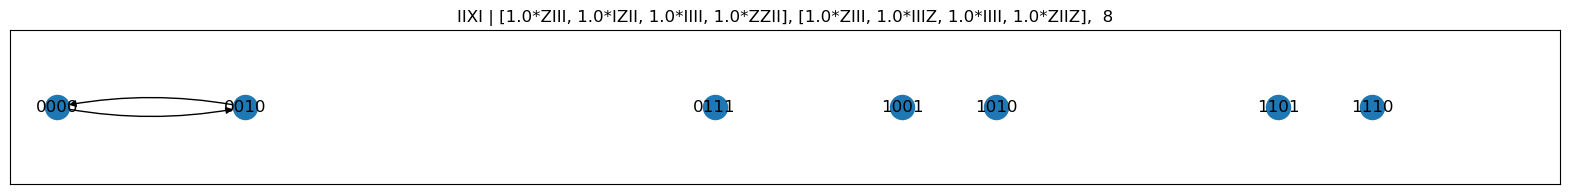

['0000', '0010']
bruteforce solution: [['x', 0], ['x', 1], ['x', 3]]
['1101', '1111']
bruteforce cost: 0 + 1 multi-controlled Rx with 3 controls.

decomposition:
 14 CX, 
 22 Rot

old cost:
 8 CX + 1.0 Rz-gates


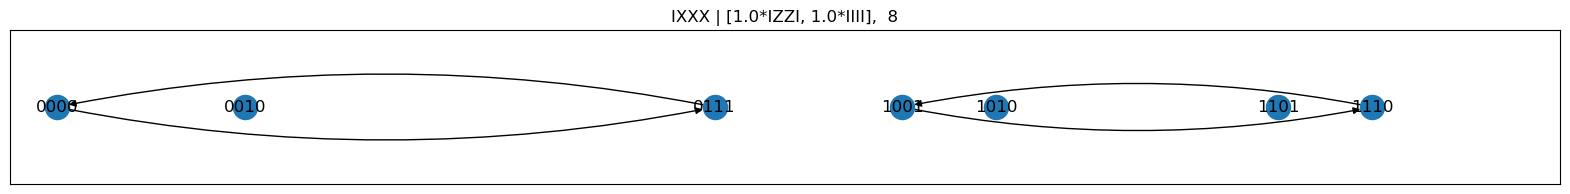

['0000', '0111', '1001', '1110']
bruteforce solution: [['x', 0], ['cx', 0, 3], ['cx', 3, 1], ['cx', 2, 3]]
['1101', '1111', '0101', '0111']
bruteforce cost: 6 + 2 multi-controlled Rx with 2 controls.

decomposition:
 14 CX, 
 8 Rot

old cost:
 8 CX + 2.0 Rz-gates


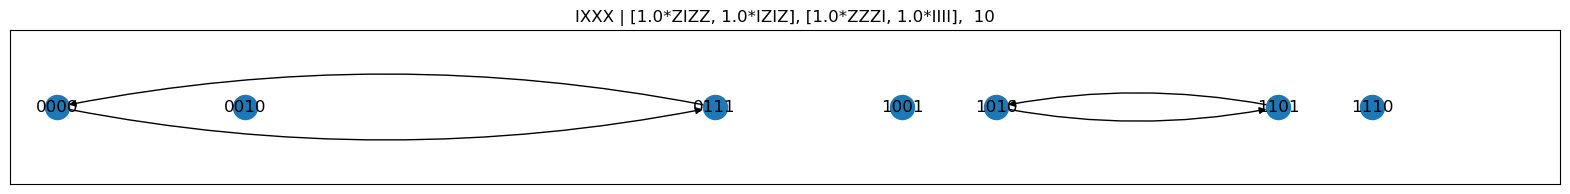

['0000', '0111', '1010', '1101']
bruteforce solution: [['x', 0], ['cx', 0, 2], ['cx', 2, 1], ['cx', 2, 3]]
['1111', '1101', '0111', '0101']
bruteforce cost: 6 + 2 multi-controlled Rx with 2 controls.

decomposition:
 14 CX, 
 8 Rot

old cost:
 10 CX + 2.0 Rz-gates


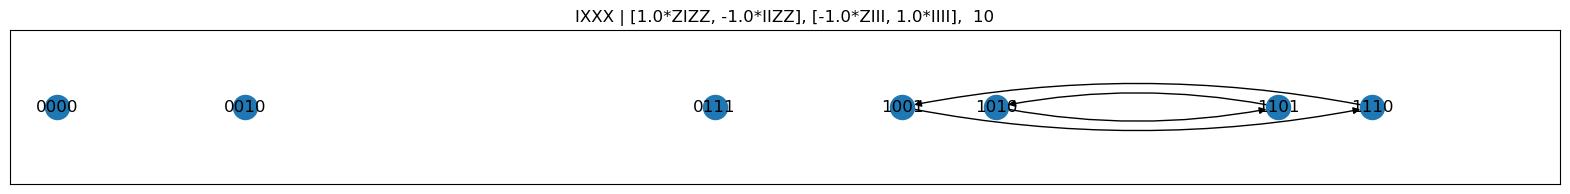

['1001', '1110', '1010', '1101']
bruteforce solution: [['cx', 2, 3]]
['1001', '1111', '1011', '1101']
bruteforce cost: 2 + 2 multi-controlled Rx with 2 controls.

decomposition:
 10 CX, 
 8 Rot

old cost:
 10 CX + 2.0 Rz-gates


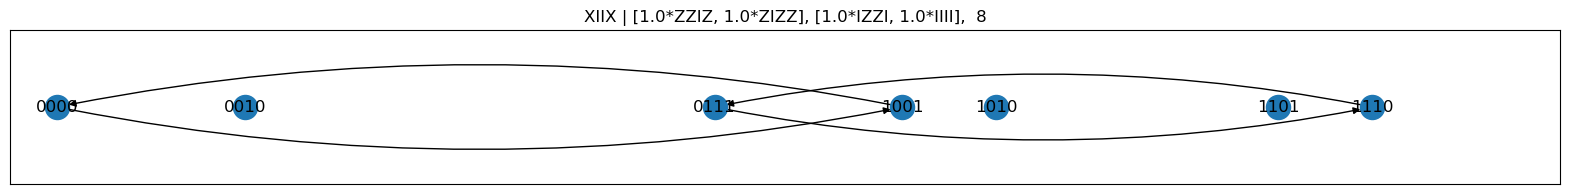

['0000', '1001', '0111', '1110']
bruteforce solution: [['x', 0], ['cx', 0, 3], ['cx', 3, 1], ['cx', 2, 3]]
['1101', '0101', '1111', '0111']
bruteforce cost: 6 + 2 multi-controlled Rx with 2 controls.

decomposition:
 14 CX, 
 8 Rot

old cost:
 8 CX + 2.0 Rz-gates


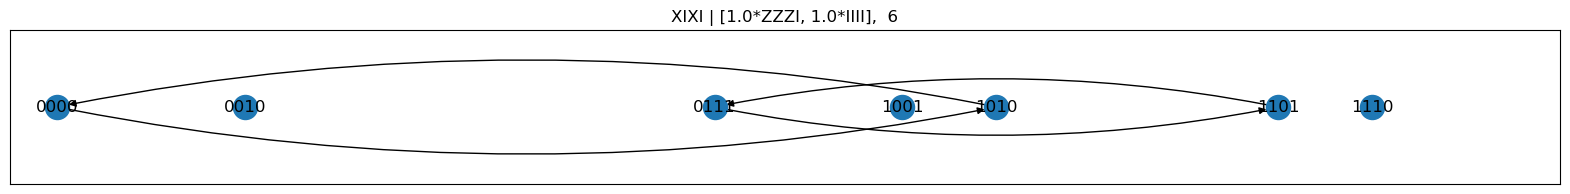

['0000', '1010', '0111', '1101']
bruteforce solution: [['x', 0], ['cx', 0, 2], ['cx', 2, 1], ['cx', 2, 3]]
['1111', '0111', '1101', '0101']
bruteforce cost: 6 + 2 multi-controlled Rx with 2 controls.

decomposition:
 14 CX, 
 8 Rot

old cost:
 6 CX + 2.0 Rz-gates


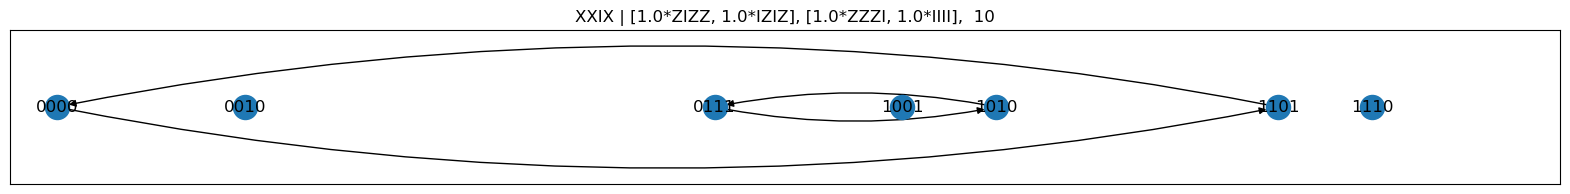

['0000', '1101', '0111', '1010']
bruteforce solution: [['x', 0], ['cx', 0, 2], ['cx', 2, 1], ['cx', 2, 3]]
['1111', '0101', '1101', '0111']
bruteforce cost: 6 + 2 multi-controlled Rx with 2 controls.

decomposition:
 14 CX, 
 8 Rot

old cost:
 10 CX + 2.0 Rz-gates


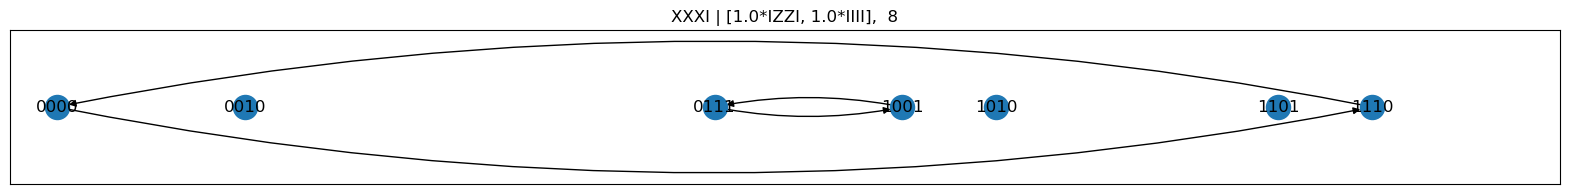

['0000', '1110', '0111', '1001']
bruteforce solution: [['x', 0], ['cx', 0, 3], ['cx', 3, 1], ['cx', 2, 3]]
['1101', '0111', '1111', '0101']
bruteforce cost: 6 + 2 multi-controlled Rx with 2 controls.

decomposition:
 14 CX, 
 8 Rot

old cost:
 8 CX + 2.0 Rz-gates


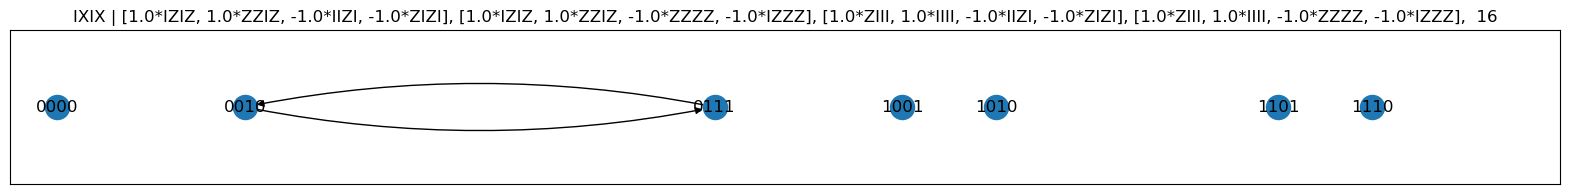

['0010', '0111']
bruteforce solution: [['x', 0], ['x', 1], ['cx', 1, 3]]
['1111', '1011']
bruteforce cost: 2 + 1 multi-controlled Rx with 3 controls.

decomposition:
 16 CX, 
 22 Rot

old cost:
 16 CX + 1.0 Rz-gates


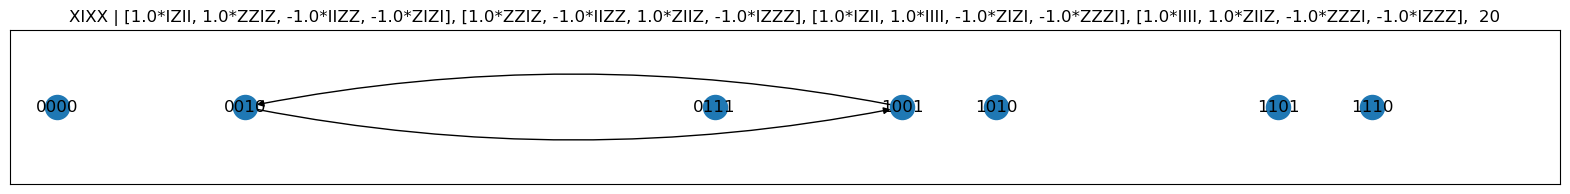

['0010', '1001']
bruteforce solution: [['x', 1], ['cx', 2, 3], ['cx', 0, 2]]
['0111', '1111']
bruteforce cost: 4 + 1 multi-controlled Rx with 3 controls.

decomposition:
 18 CX, 
 22 Rot

old cost:
 20 CX + 1.0 Rz-gates


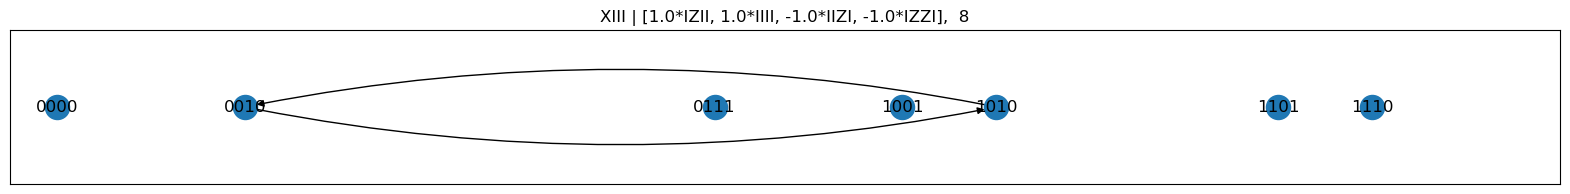

['0010', '1010']
bruteforce solution: [['x', 1], ['x', 3]]
['0111', '1111']
bruteforce cost: 0 + 1 multi-controlled Rx with 3 controls.

decomposition:
 14 CX, 
 22 Rot

old cost:
 8 CX + 1.0 Rz-gates


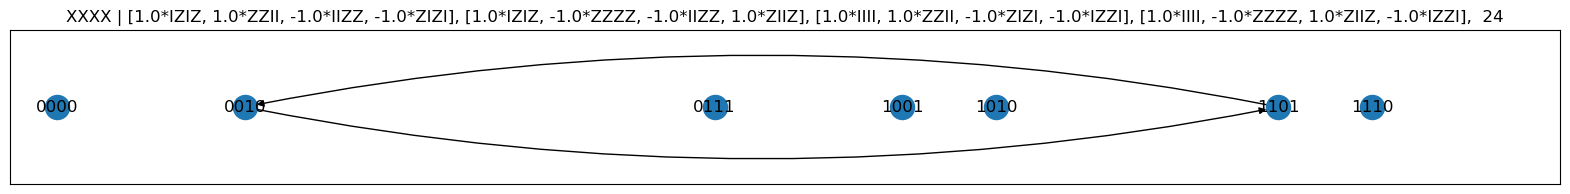

['0010', '1101']
bruteforce solution: [['cx', 2, 0], ['cx', 2, 1], ['cx', 2, 3]]
['1111', '1101']
bruteforce cost: 6 + 1 multi-controlled Rx with 3 controls.

decomposition:
 20 CX, 
 22 Rot

old cost:
 24 CX + 1.0 Rz-gates


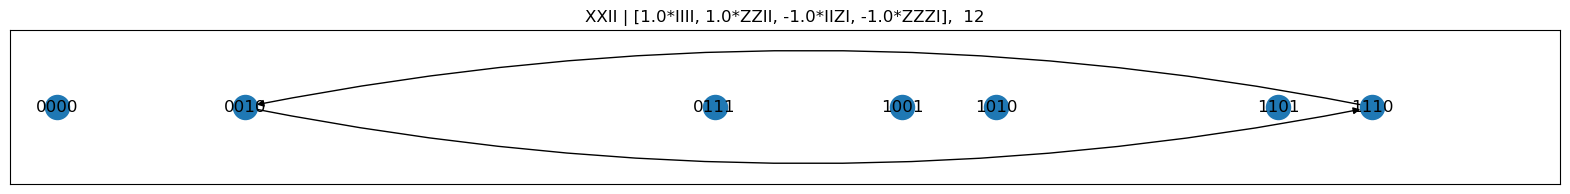

['0010', '1110']
bruteforce solution: [['x', 0], ['cx', 0, 1], ['x', 3]]
['1111', '0111']
bruteforce cost: 2 + 1 multi-controlled Rx with 3 controls.

decomposition:
 16 CX, 
 22 Rot

old cost:
 12 CX + 1.0 Rz-gates


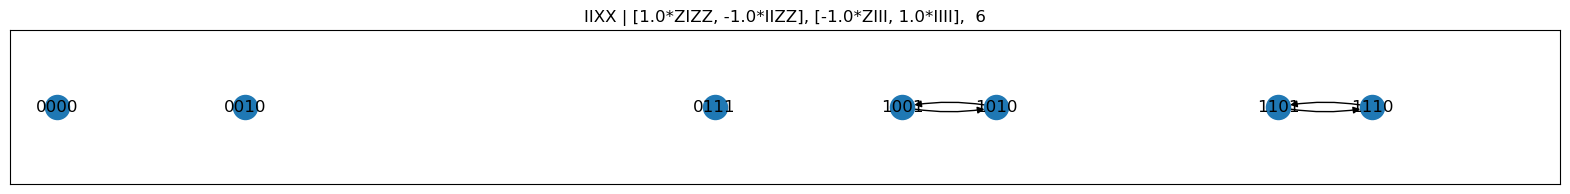

['1001', '1010', '1101', '1110']
bruteforce solution: [['cx', 2, 3]]
['1001', '1011', '1101', '1111']
bruteforce cost: 2 + 2 multi-controlled Rx with 2 controls.

decomposition:
 10 CX, 
 8 Rot

old cost:
 6 CX + 2.0 Rz-gates


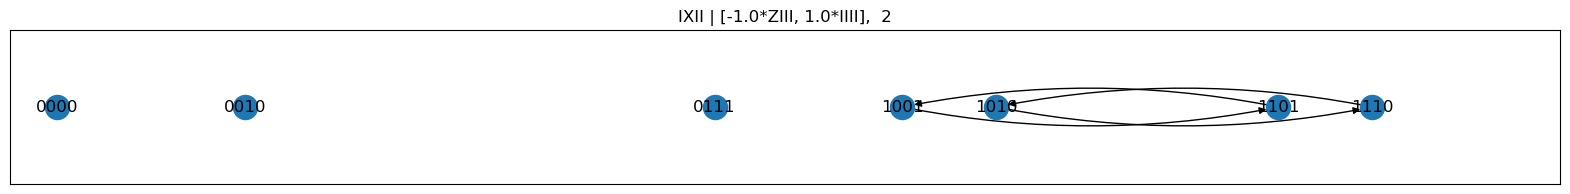

['1001', '1101', '1010', '1110']
bruteforce solution: [['cx', 2, 3]]
['1001', '1101', '1011', '1111']
bruteforce cost: 2 + 2 multi-controlled Rx with 2 controls.

decomposition:
 10 CX, 
 8 Rot

old cost:
 2 CX + 2.0 Rz-gates

 

Reduced case: 
 

Num of CX gates:
Pauli-string      brute-force    old
--------------  -------------  -----
IIXI                       14      8
IXXX                       14      8
IXXX                       14     10
IXXX                       10     10
XIIX                       14      8
XIXI                       14      6
XXIX                       14     10
XXXI                       14      8
IXIX                       16     16
XIXX                       18     20
XIII                       14      8
XXXX                       20     24
XXII                       16     12
IIXX                       10      6
IXII                       10      2

 

Num of rotational gates:
Pauli-string      brute-force    old
--------------  -------------  -----
IIX

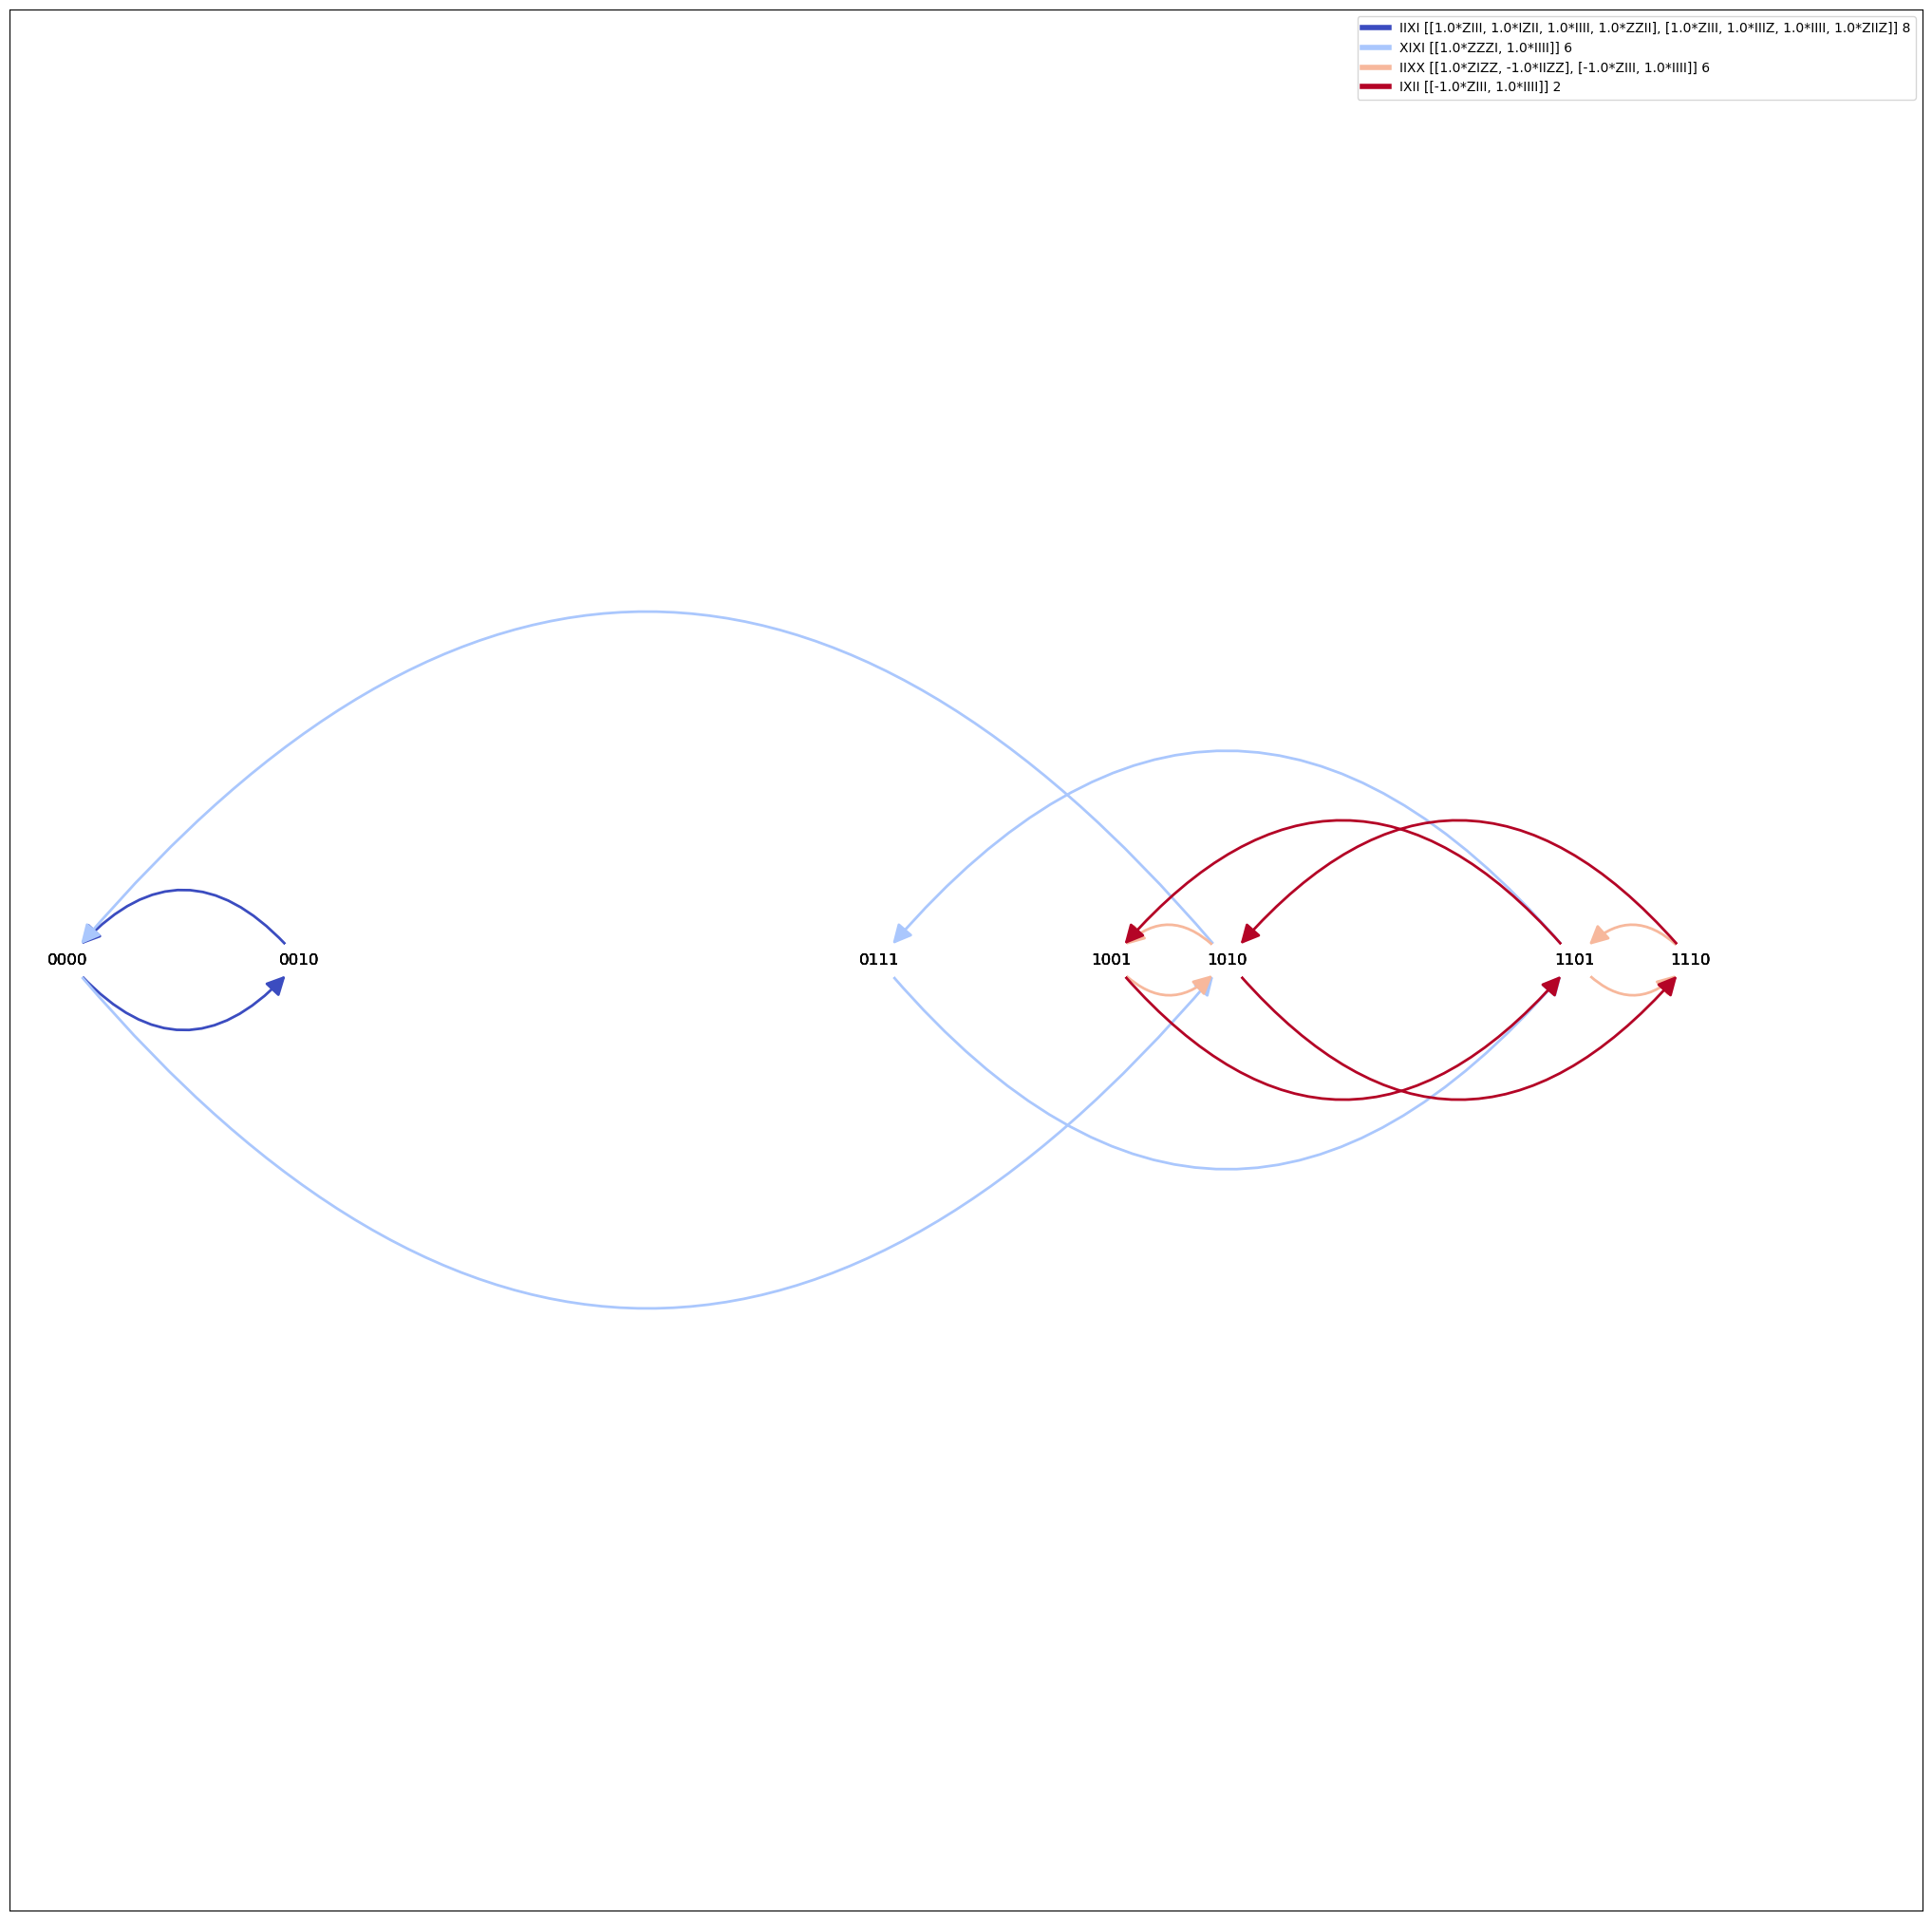

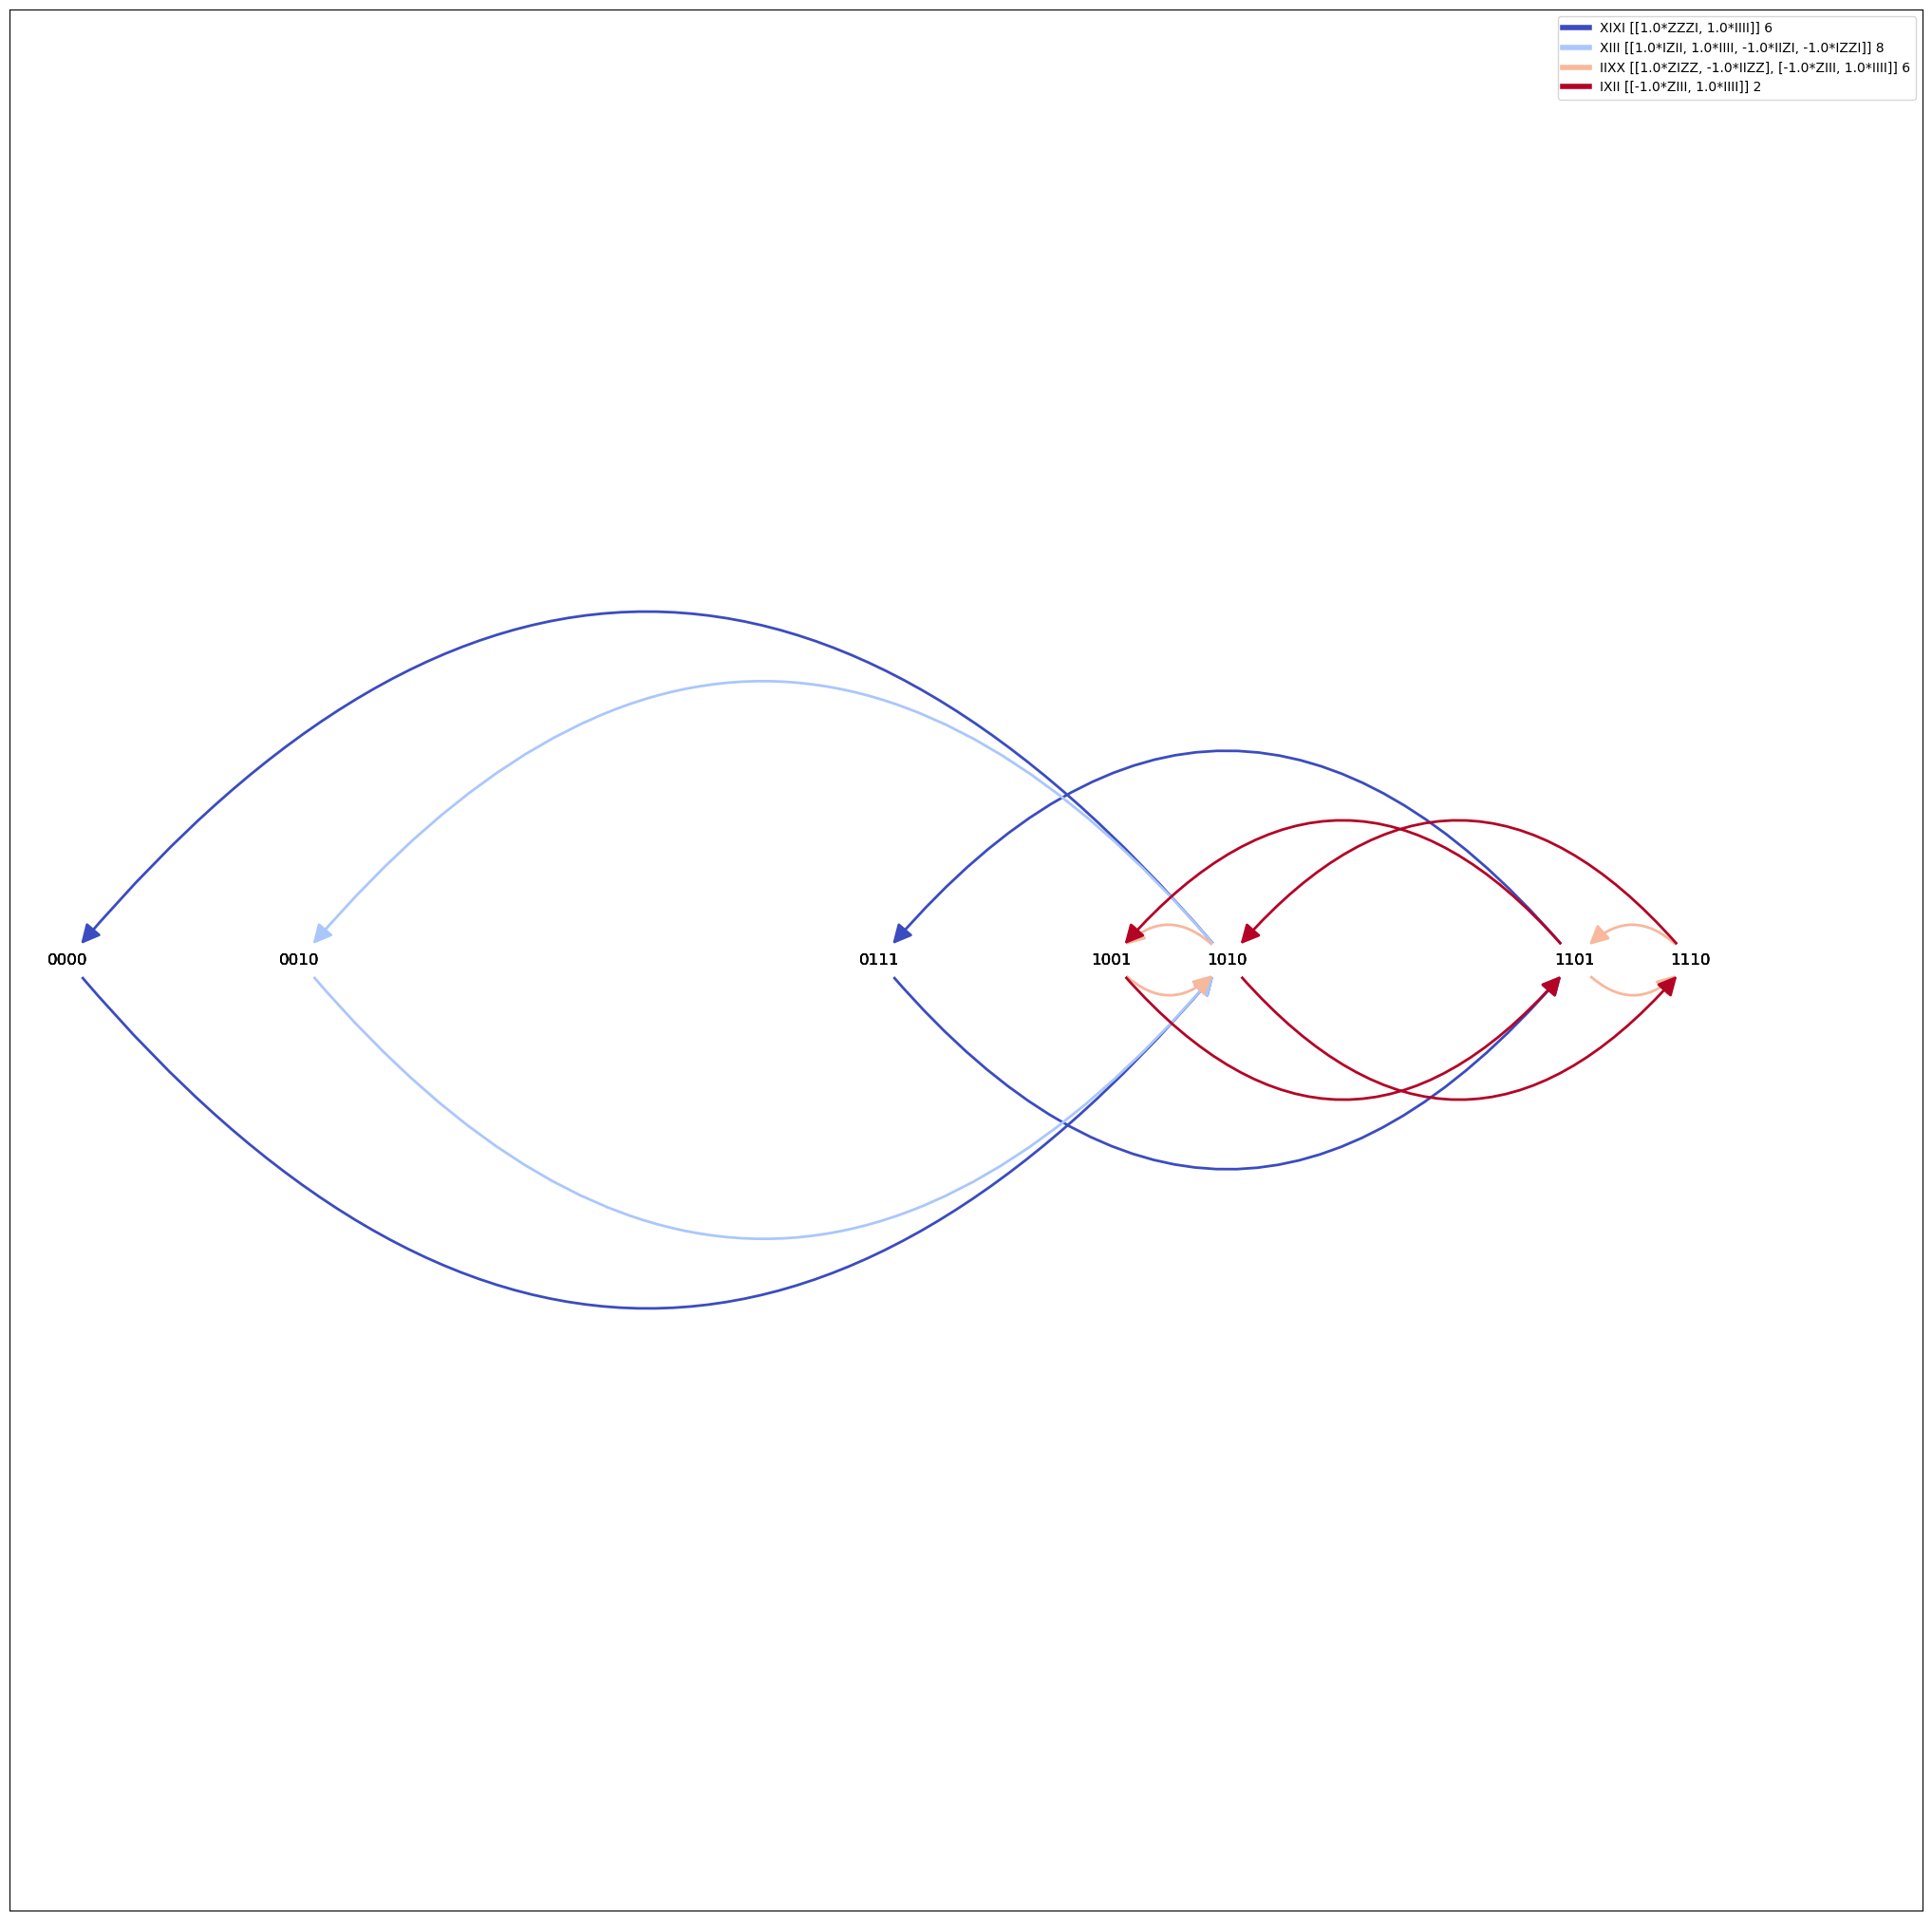

In [12]:
m=Mixer(B,digraph=True, reduced=True,sort=True)
print("commpairs=", m.commuting_pairs)

m.get_best_mixer_commuting_graphs()

table_of_cx = []
table_of_r = []

for g in m.graph_family:
    plt.figure(figsize=(20,2))
    tmp=""
    for ps in g.PS_reduced:
        tmp+=str(ps)+", "
    plt.title(g.Xl+" | "+tmp+" "+str(g.cost_reduced))
    nx.draw_networkx_nodes(g.G, g.positions)
    nx.draw_networkx_labels(g.G, g.positions, labels=g.labels)
    nx.draw_networkx_edges(g.G, g.positions, connectionstyle="arc3,rad=0.1")
    plt.xlim([-.5,2**len(B[0])])
    plt.show()
    #print(g.G.edges)
    selection = []
    for e in g.G.edges:
        for n in e:
            if n in selection:
                pass
            else:
                selection.append(n)
    #print(g.G.edges, selection)
    group_size = len(g.G.edges)
    k = int(np.log2(len(selection)))
    n = len(selection[0])
    m_ = n-k
    bruteforce_solution, bruteforce_cost, bruteforce_solution_result, bruteforce_sorted_bits = find_solution(selection,maxcost=100+40*k*m_,maxdepth=5+2*k*m_)
    print(selection)
    print('bruteforce solution:',bruteforce_solution)
    print(bruteforce_solution_result)
    
    bruteforce_cost = 0
    for gate in bruteforce_solution:
        if gate[0] == 'cx':
            bruteforce_cost += 1
    
    num_cx, num_r = decompose_mcrx(m_)
    num_cx *= k
    num_r *= k
    
    cmstring = ''
    for i in range(m_):
        cmstring += 'C'
    cmstring += 'X'
    cnstring = ''
    for i in range(n-1):
        cnstring += 'C'
    cnstring += 'X'
    print('bruteforce cost:',2*bruteforce_cost, '+' ,k,'multi-controlled Rx with',m_,'controls.\n')
    print('decomposition:\n',2*bruteforce_cost+num_cx, 'CX, \n',num_r,'Rot\n')
    print('old cost:\n',g.cost_reduced,'CX +',np.log2(group_size),'Rz-gates')
    table_of_cx.append([g.Xl, 2*bruteforce_cost+num_cx, g.cost_reduced])
    table_of_r.append([g.Xl, num_r,group_size])
    
print('\n \n')
print('Reduced case: \n \n')
print('Num of CX gates:')
print(tabulate(table_of_cx, headers=['Pauli-string', 'brute-force', 'old']))

print('\n \n')  
print('Num of rotational gates:')
print(tabulate(table_of_r, headers=['Pauli-string', 'brute-force', 'old']))
    
print('\n \n')  
for g in m.solution_reduced[0]:
    print(g.Xl, g.PS_reduced)

plotsolution(m, True, plotall=True, dicke=False)
print("cost=",m.solution_reduced_cost)

computing family of graphs


100%|██████████| 13/13 [00:00<00:00, 45.25it/s]


commpairs= {'IIXI': [[0, 1]], 'IXXX': [[0, 2], [3, 6], [4, 5]], 'XIIX': [[0, 3], [2, 6]], 'XIXI': [[0, 4], [2, 5]], 'XXIX': [[0, 5], [2, 4]], 'XXXI': [[0, 6], [2, 3]], 'IXIX': [[1, 2]], 'XIXX': [[1, 3]], 'XIII': [[1, 4]], 'XXXX': [[1, 5]], 'XXII': [[1, 6]], 'IIXX': [[3, 4], [5, 6]], 'IXII': [[3, 5], [4, 6]]}
0 / 15 Number of combinations  15  choose  0 = 1.0


1it [00:00, ?it/s]


1 / 15 Number of combinations  15  choose  1 = 15.0


15it [00:00, ?it/s]


2 / 15 Number of combinations  15  choose  2 = 105.0


105it [00:00, 80674.47it/s]


3 / 15 Number of combinations  15  choose  3 = 455.0


455it [00:00, 8647.81it/s]


4 / 15 Number of combinations  15  choose  4 = 1365.0


1365it [00:00, 19492.65it/s]


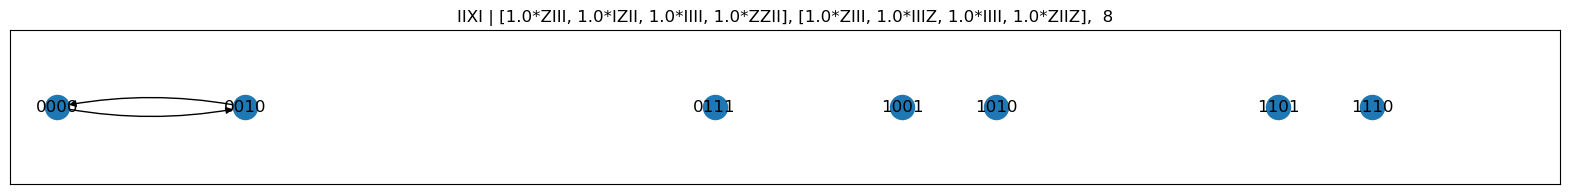

['0000', '0010']
bruteforce solution: [['x', 0], ['x', 1], ['x', 3]]
['1101', '1111']
bruteforce cost: 0 + 1 multi-controlled Rx with 2 controls.

decomposition:
 4 CX, 
 4 Rot

old cost:
 24 CX + 1 Rz-gates


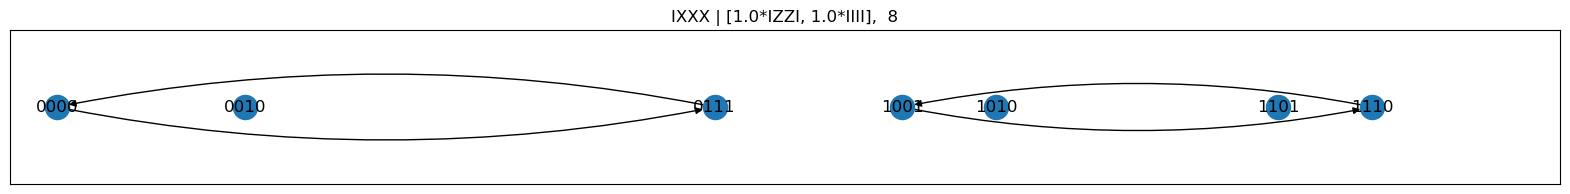

['0000', '0111', '1001', '1110']
bruteforce solution: [['x', 0], ['cx', 0, 3], ['cx', 3, 1], ['cx', 2, 3]]
['1101', '1111', '0101', '0111']
bruteforce cost: 6 + 2 multi-controlled Rx with 1 controls.

decomposition:
 10 CX, 
 6 Rot

old cost:
 20 CX + 2 Rz-gates


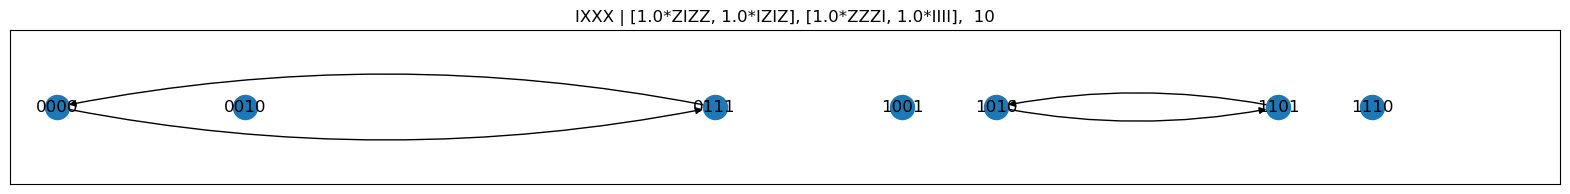

['0000', '0111', '1010', '1101']
bruteforce solution: [['x', 0], ['cx', 0, 2], ['cx', 2, 1], ['cx', 2, 3]]
['1111', '1101', '0111', '0101']
bruteforce cost: 6 + 2 multi-controlled Rx with 1 controls.

decomposition:
 10 CX, 
 6 Rot

old cost:
 20 CX + 2 Rz-gates


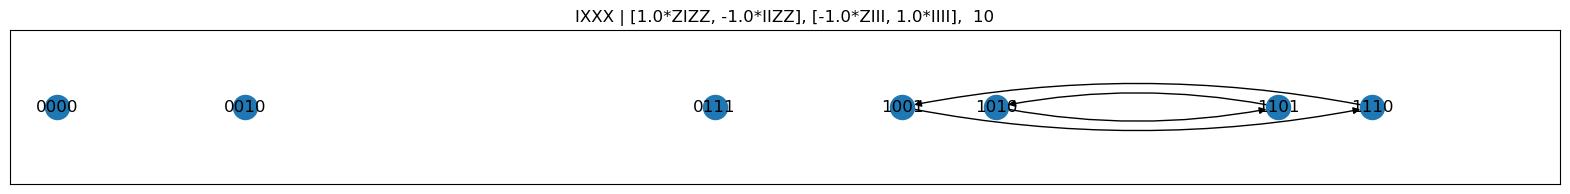

['1001', '1110', '1010', '1101']
bruteforce solution: [['cx', 2, 3]]
['1001', '1111', '1011', '1101']
bruteforce cost: 2 + 2 multi-controlled Rx with 1 controls.

decomposition:
 6 CX, 
 6 Rot

old cost:
 20 CX + 2 Rz-gates


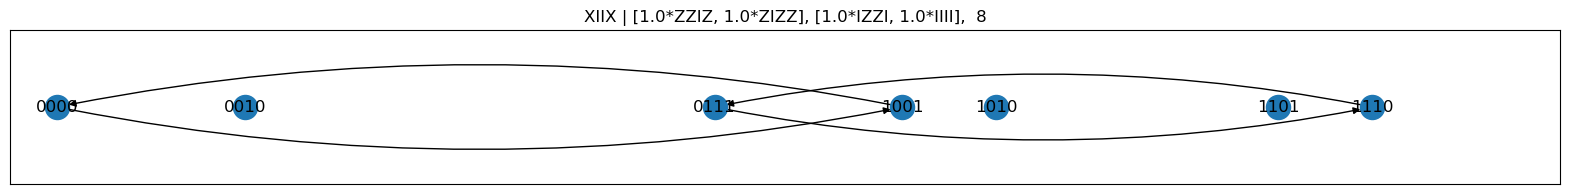

['0000', '1001', '0111', '1110']
bruteforce solution: [['x', 0], ['cx', 0, 3], ['cx', 3, 1], ['cx', 2, 3]]
['1101', '0101', '1111', '0111']
bruteforce cost: 6 + 2 multi-controlled Rx with 1 controls.

decomposition:
 10 CX, 
 6 Rot

old cost:
 16 CX + 2 Rz-gates


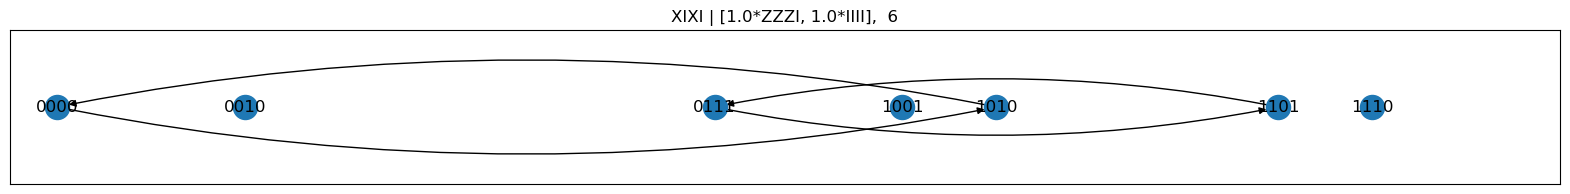

['0000', '1010', '0111', '1101']
bruteforce solution: [['x', 0], ['cx', 0, 2], ['cx', 2, 1], ['cx', 2, 3]]
['1111', '0111', '1101', '0101']
bruteforce cost: 6 + 2 multi-controlled Rx with 1 controls.

decomposition:
 10 CX, 
 6 Rot

old cost:
 16 CX + 2 Rz-gates


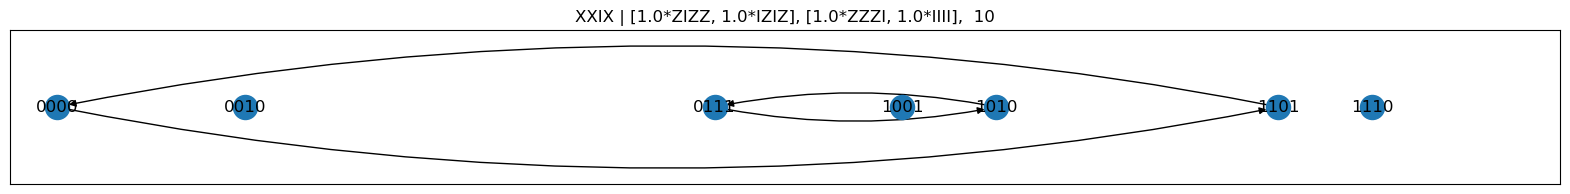

['0000', '1101', '0111', '1010']
bruteforce solution: [['x', 0], ['cx', 0, 2], ['cx', 2, 1], ['cx', 2, 3]]
['1111', '0101', '1101', '0111']
bruteforce cost: 6 + 2 multi-controlled Rx with 1 controls.

decomposition:
 10 CX, 
 6 Rot

old cost:
 20 CX + 2 Rz-gates


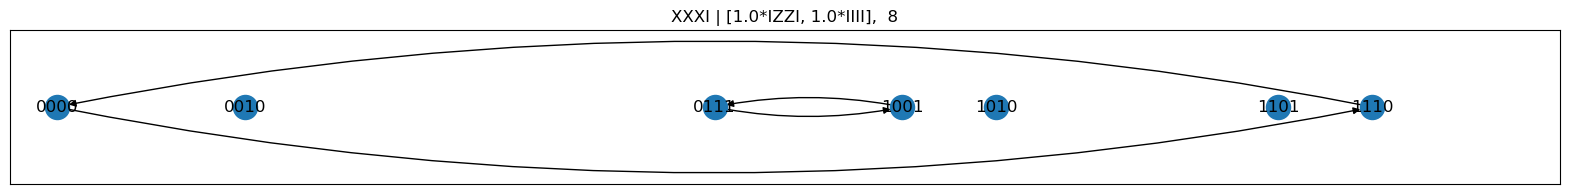

['0000', '1110', '0111', '1001']
bruteforce solution: [['x', 0], ['cx', 0, 3], ['cx', 3, 1], ['cx', 2, 3]]
['1101', '0111', '1111', '0101']
bruteforce cost: 6 + 2 multi-controlled Rx with 1 controls.

decomposition:
 10 CX, 
 6 Rot

old cost:
 20 CX + 2 Rz-gates


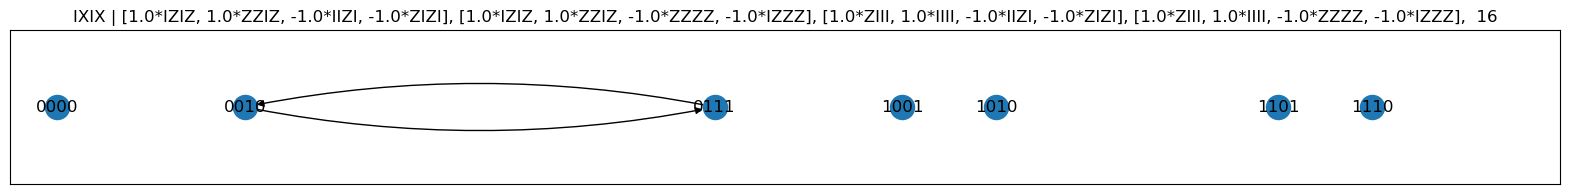

['0010', '0111']
bruteforce solution: [['x', 0], ['x', 1], ['cx', 1, 3]]
['1111', '1011']
bruteforce cost: 2 + 1 multi-controlled Rx with 2 controls.

decomposition:
 6 CX, 
 4 Rot

old cost:
 32 CX + 1 Rz-gates


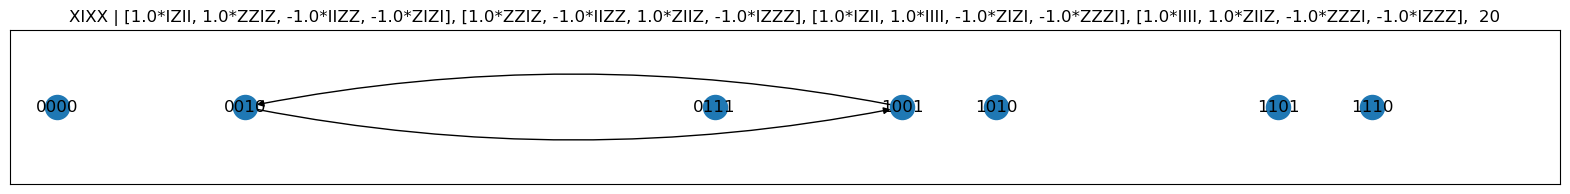

['0010', '1001']
bruteforce solution: [['x', 1], ['cx', 2, 3], ['cx', 0, 2]]
['0111', '1111']
bruteforce cost: 4 + 1 multi-controlled Rx with 2 controls.

decomposition:
 8 CX, 
 4 Rot

old cost:
 40 CX + 1 Rz-gates


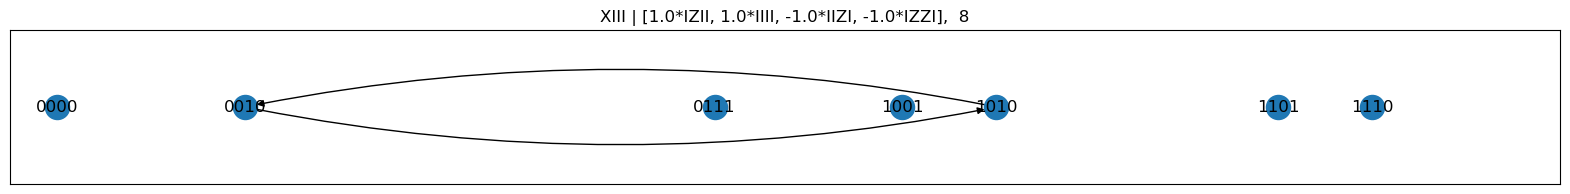

['0010', '1010']
bruteforce solution: [['x', 1], ['x', 3]]
['0111', '1111']
bruteforce cost: 0 + 1 multi-controlled Rx with 2 controls.

decomposition:
 4 CX, 
 4 Rot

old cost:
 24 CX + 1 Rz-gates


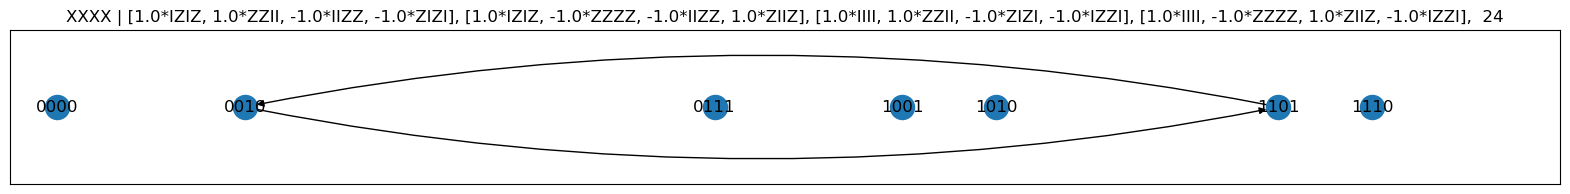

['0010', '1101']
bruteforce solution: [['cx', 2, 0], ['cx', 2, 1], ['cx', 2, 3]]
['1111', '1101']
bruteforce cost: 6 + 1 multi-controlled Rx with 2 controls.

decomposition:
 10 CX, 
 4 Rot

old cost:
 48 CX + 1 Rz-gates


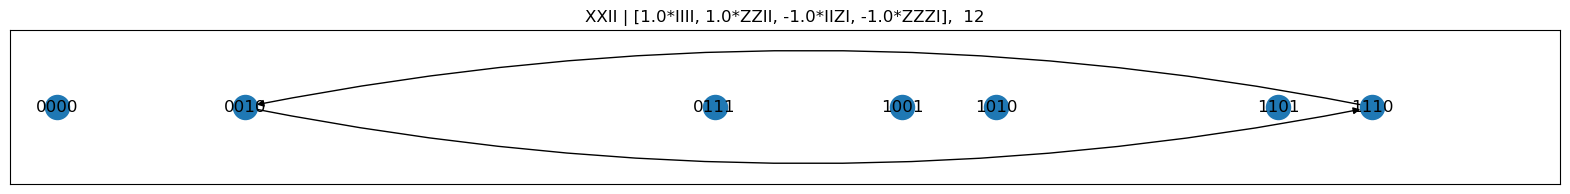

['0010', '1110']
bruteforce solution: [['x', 0], ['cx', 0, 1], ['x', 3]]
['1111', '0111']
bruteforce cost: 2 + 1 multi-controlled Rx with 2 controls.

decomposition:
 6 CX, 
 4 Rot

old cost:
 32 CX + 1 Rz-gates


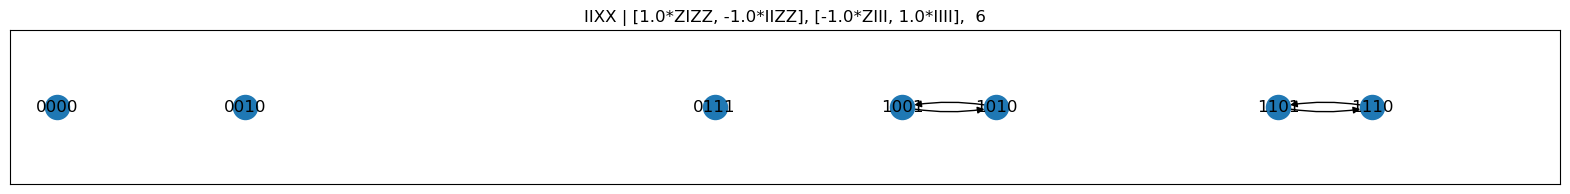

['1001', '1010', '1101', '1110']
bruteforce solution: [['cx', 2, 3]]
['1001', '1011', '1101', '1111']
bruteforce cost: 2 + 2 multi-controlled Rx with 1 controls.

decomposition:
 6 CX, 
 6 Rot

old cost:
 12 CX + 2 Rz-gates


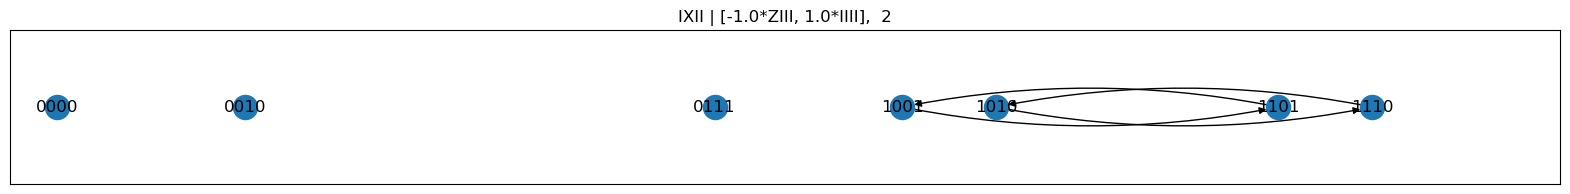

['1001', '1101', '1010', '1110']
bruteforce solution: [['cx', 2, 3]]
['1001', '1101', '1011', '1111']
bruteforce cost: 2 + 2 multi-controlled Rx with 1 controls.

decomposition:
 6 CX, 
 6 Rot

old cost:
 12 CX + 2 Rz-gates
Brute force vs. old costs (random examples):
  Num qubits    Num generators    CX cost (bf)    R cost (bf)    CX cost (old)    R cost (old)
------------  ----------------  --------------  -------------  ---------------  --------------
           4                 1               4              4               24               1
           4                 2              10              6               20               2
           4                 2              10              6               20               2
           4                 2               6              6               20               2
           4                 2              10              6               16               2
           4                 2              10              6     

In [14]:
table_of_costs = []
m=Mixer(B,digraph=True, reduced=True,sort=True)
print("commpairs=", m.commuting_pairs)

m.get_best_mixer_commuting_graphs()

table_of_cx = []
table_of_r = []

for g in m.graph_family:
    plt.figure(figsize=(20,2))
    tmp=""
    for ps in g.PS_reduced:
        tmp+=str(ps)+", "
    plt.title(g.Xl+" | "+tmp+" "+str(g.cost_reduced))
    nx.draw_networkx_nodes(g.G, g.positions)
    nx.draw_networkx_labels(g.G, g.positions, labels=g.labels)
    nx.draw_networkx_edges(g.G, g.positions, connectionstyle="arc3,rad=0.1")
    plt.xlim([-.5,2**len(B[0])])
    plt.show()
    #print(g.G.edges)
    selection = []
    for e in g.G.edges:
        for n in e:
            if n in selection:
                pass
            else:
                selection.append(n)
    #print(g.G.edges, selection)
    group_size = len(g.G.edges)
    k = int(np.log2(len(selection)))
    n = len(selection[0])
    m_ = n-k-1
    bruteforce_solution, bruteforce_cost, bruteforce_solution_result, bruteforce_sorted_bits = find_solution(selection,maxcost=100+40*k*m_,maxdepth=5+2*k*m_)
    print(selection)
    print('bruteforce solution:',bruteforce_solution)
    print(bruteforce_solution_result)
    
    bruteforce_cost = 0
    for gate in bruteforce_solution:
        if gate[0] == 'cx':
            bruteforce_cost += 1
    
    num_cx, num_r = decompose_mcrx(m_)
    num_cx *= k
    num_r *= k
    
    cmstring = ''
    for i in range(m_):
        cmstring += 'C'
    cmstring += 'X'
    cnstring = ''
    for i in range(n-1):
        cnstring += 'C'
    cnstring += 'X'
    print('bruteforce cost:',2*bruteforce_cost, '+' ,k,'multi-controlled Rx with',m_,'controls.\n')
    print('decomposition:\n',2*bruteforce_cost+num_cx, 'CX, \n',num_r,'Rot\n')
    
    print('old cost:\n',g.cost,'CX +',int(np.log2(group_size)),'Rz-gates')
    
    table_of_costs.append([n,k, 2*bruteforce_cost+num_cx, num_r, g.cost, int(np.log2(group_size))])

        
        
print('Brute force vs. old costs (random examples):')
print(tabulate(table_of_costs, headers=['Num qubits', 'Num generators', 'CX cost (bf)', 'R cost (bf)', 'CX cost (old)', 'R cost (old)']))   

print('\n \n') 

computing family of graphs


100%|██████████| 13/13 [00:00<00:00, 39.36it/s]


commpairs= {'IIXI': [[0, 1]], 'IXXX': [[0, 2], [3, 6], [4, 5]], 'XIIX': [[0, 3], [2, 6]], 'XIXI': [[0, 4], [2, 5]], 'XXIX': [[0, 5], [2, 4]], 'XXXI': [[0, 6], [2, 3]], 'IXIX': [[1, 2]], 'XIXX': [[1, 3]], 'XIII': [[1, 4]], 'XXXX': [[1, 5]], 'XXII': [[1, 6]], 'IIXX': [[3, 4], [5, 6]], 'IXII': [[3, 5], [4, 6]]}
0 / 15 Number of combinations  15  choose  0 = 1.0


1it [00:00, 1907.37it/s]


1 / 15 Number of combinations  15  choose  1 = 15.0


15it [00:00, 30203.82it/s]


2 / 15 Number of combinations  15  choose  2 = 105.0


105it [00:00, ?it/s]


3 / 15 Number of combinations  15  choose  3 = 455.0


455it [00:00, 6905.64it/s]


4 / 15 Number of combinations  15  choose  4 = 1365.0


1365it [00:00, 16123.81it/s]


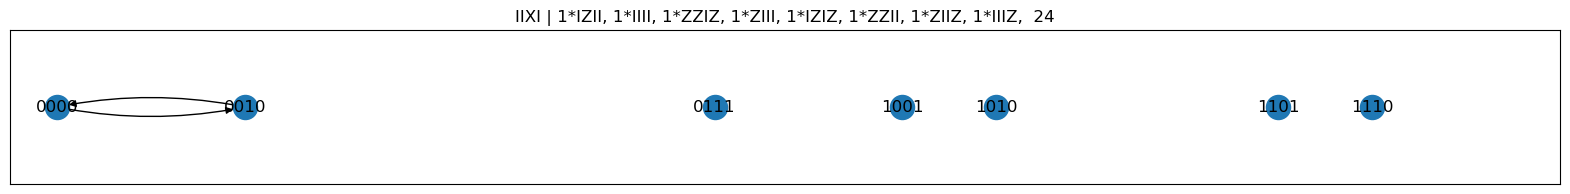

['0000', '0010']
bruteforce solution: [['x', 0], ['x', 1], ['x', 3]]
['1101', '1111']
bruteforce cost: 0 + a multi-controlled Rz with 2 controls.

decomposition:
 8 CX, 
 9 Rotations,

old cost:
 24 CX + 1 Rz-gates


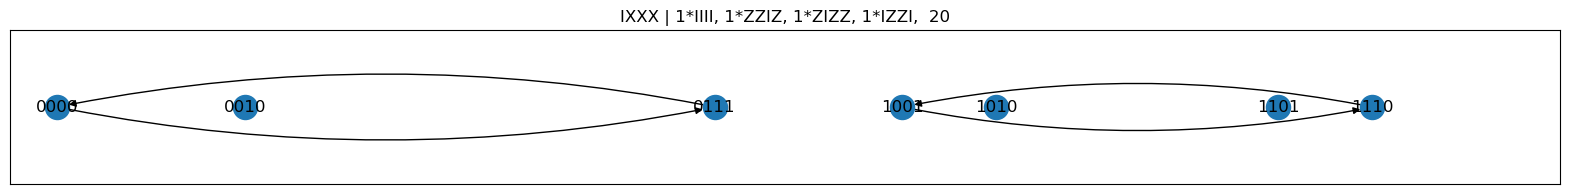

['0000', '0111', '1001', '1110']
bruteforce solution: [['x', 0], ['cx', 0, 3], ['cx', 3, 1], ['cx', 2, 3]]
['1101', '1111', '0101', '0111']
bruteforce cost: 6 + a multi-controlled Rz with 1 controls.

decomposition:
 8 CX, 
 2 Rotations,

old cost:
 20 CX + 2 Rz-gates


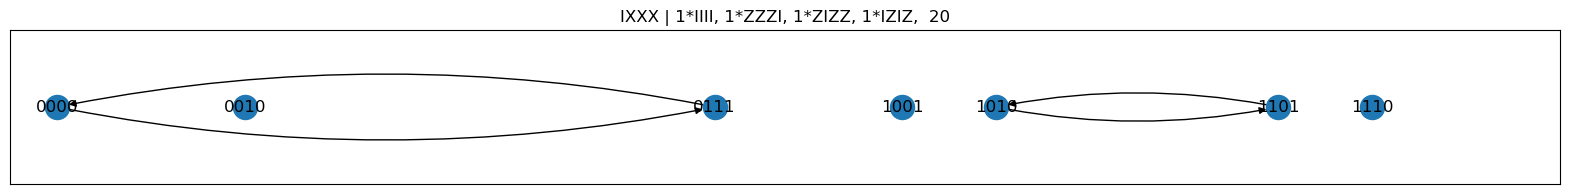

['0000', '0111', '1010', '1101']
bruteforce solution: [['x', 0], ['cx', 0, 2], ['cx', 2, 1], ['cx', 2, 3]]
['1111', '1101', '0111', '0101']
bruteforce cost: 6 + a multi-controlled Rz with 1 controls.

decomposition:
 8 CX, 
 2 Rotations,

old cost:
 20 CX + 2 Rz-gates


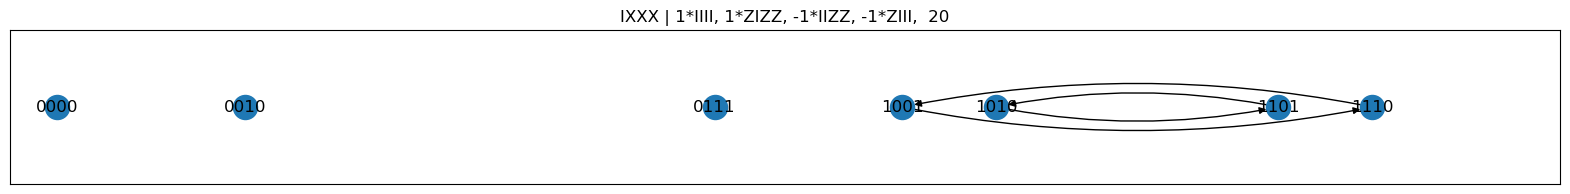

['1001', '1110', '1010', '1101']
bruteforce solution: [['cx', 2, 3]]
['1001', '1111', '1011', '1101']
bruteforce cost: 2 + a multi-controlled Rz with 1 controls.

decomposition:
 4 CX, 
 2 Rotations,

old cost:
 20 CX + 2 Rz-gates


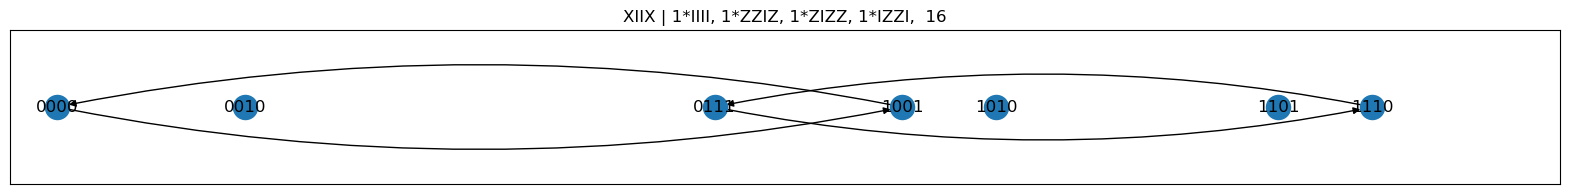

['0000', '1001', '0111', '1110']
bruteforce solution: [['x', 0], ['cx', 0, 3], ['cx', 3, 1], ['cx', 2, 3]]
['1101', '0101', '1111', '0111']
bruteforce cost: 6 + a multi-controlled Rz with 1 controls.

decomposition:
 8 CX, 
 2 Rotations,

old cost:
 16 CX + 2 Rz-gates


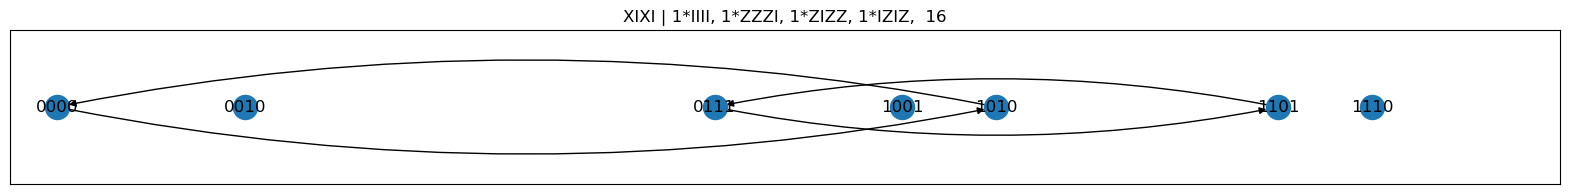

['0000', '1010', '0111', '1101']
bruteforce solution: [['x', 0], ['cx', 0, 2], ['cx', 2, 1], ['cx', 2, 3]]
['1111', '0111', '1101', '0101']
bruteforce cost: 6 + a multi-controlled Rz with 1 controls.

decomposition:
 8 CX, 
 2 Rotations,

old cost:
 16 CX + 2 Rz-gates


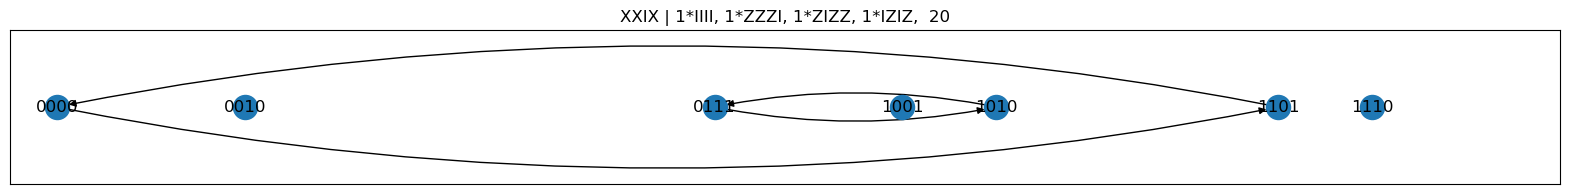

['0000', '1101', '0111', '1010']
bruteforce solution: [['x', 0], ['cx', 0, 2], ['cx', 2, 1], ['cx', 2, 3]]
['1111', '0101', '1101', '0111']
bruteforce cost: 6 + a multi-controlled Rz with 1 controls.

decomposition:
 8 CX, 
 2 Rotations,

old cost:
 20 CX + 2 Rz-gates


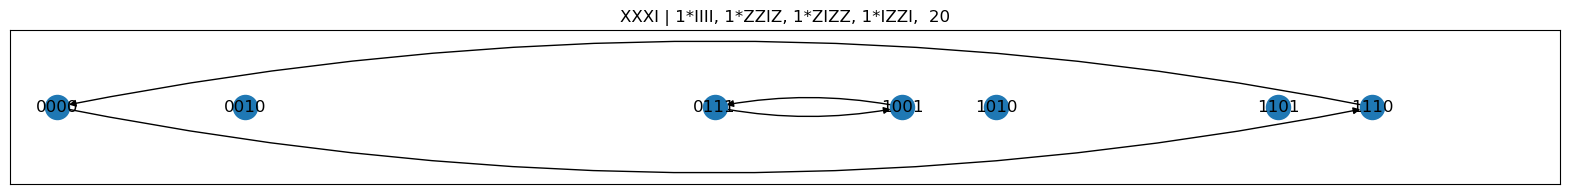

['0000', '1110', '0111', '1001']
bruteforce solution: [['x', 0], ['cx', 0, 3], ['cx', 3, 1], ['cx', 2, 3]]
['1101', '0111', '1111', '0101']
bruteforce cost: 6 + a multi-controlled Rz with 1 controls.

decomposition:
 8 CX, 
 2 Rotations,

old cost:
 20 CX + 2 Rz-gates


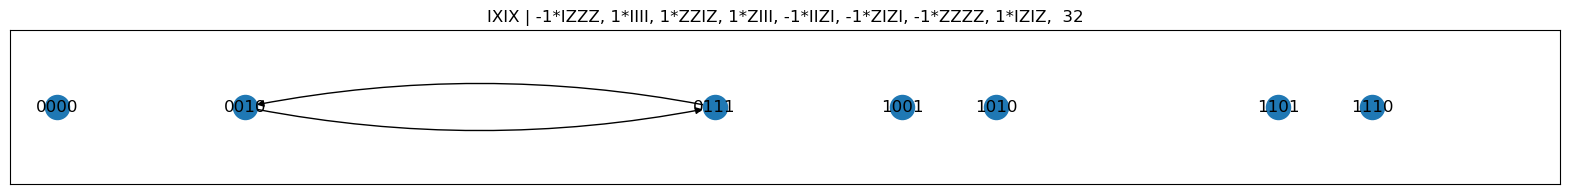

['0010', '0111']
bruteforce solution: [['x', 0], ['x', 1], ['cx', 1, 3]]
['1111', '1011']
bruteforce cost: 2 + a multi-controlled Rz with 2 controls.

decomposition:
 10 CX, 
 9 Rotations,

old cost:
 32 CX + 1 Rz-gates


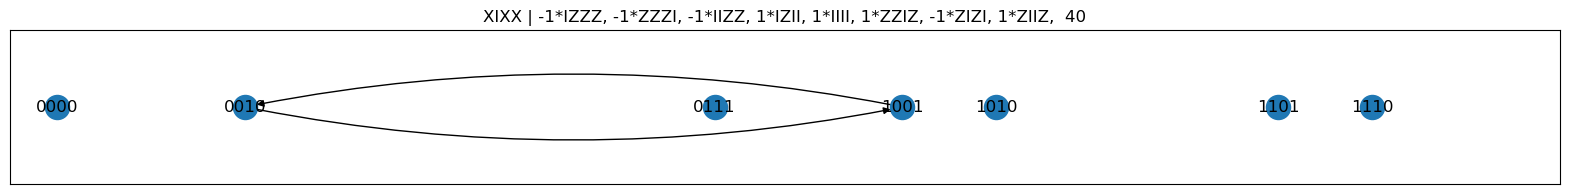

['0010', '1001']
bruteforce solution: [['x', 1], ['cx', 2, 3], ['cx', 0, 2]]
['0111', '1111']
bruteforce cost: 4 + a multi-controlled Rz with 2 controls.

decomposition:
 12 CX, 
 9 Rotations,

old cost:
 40 CX + 1 Rz-gates


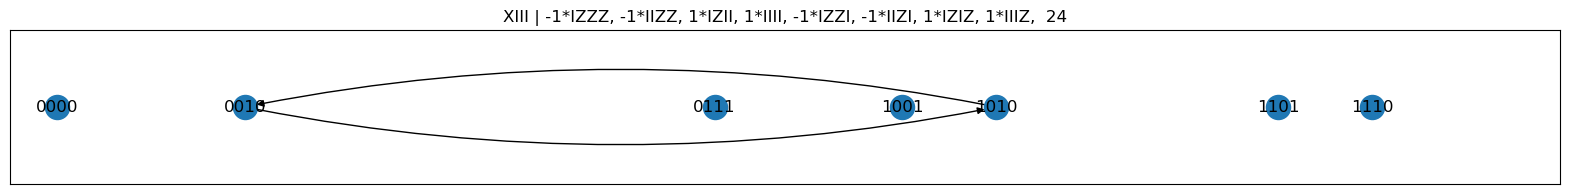

['0010', '1010']
bruteforce solution: [['x', 1], ['x', 3]]
['0111', '1111']
bruteforce cost: 0 + a multi-controlled Rz with 2 controls.

decomposition:
 8 CX, 
 9 Rotations,

old cost:
 24 CX + 1 Rz-gates


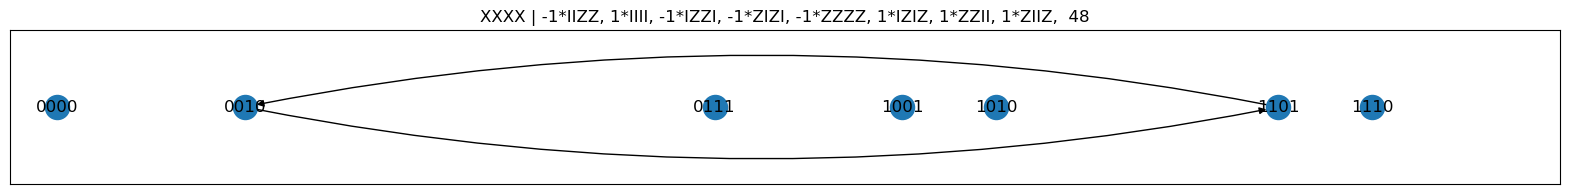

['0010', '1101']
bruteforce solution: [['cx', 2, 0], ['cx', 2, 1], ['cx', 2, 3]]
['1111', '1101']
bruteforce cost: 6 + a multi-controlled Rz with 2 controls.

decomposition:
 14 CX, 
 9 Rotations,

old cost:
 48 CX + 1 Rz-gates


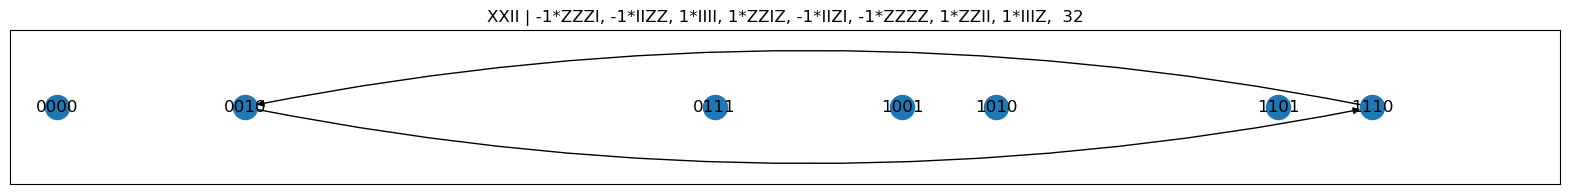

['0010', '1110']
bruteforce solution: [['x', 0], ['cx', 0, 1], ['x', 3]]
['1111', '0111']
bruteforce cost: 2 + a multi-controlled Rz with 2 controls.

decomposition:
 10 CX, 
 9 Rotations,

old cost:
 32 CX + 1 Rz-gates


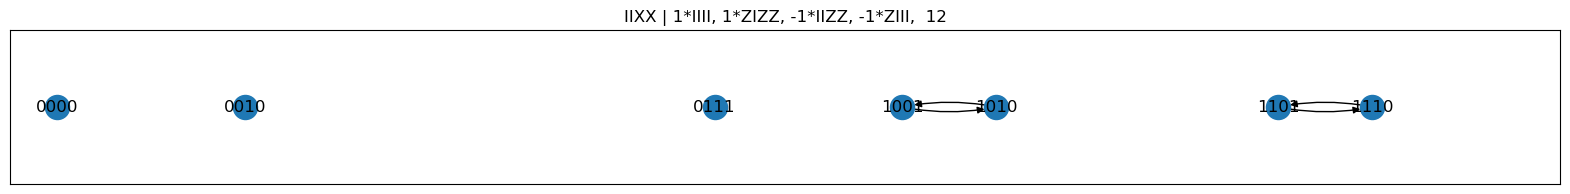

['1001', '1010', '1101', '1110']
bruteforce solution: [['cx', 2, 3]]
['1001', '1011', '1101', '1111']
bruteforce cost: 2 + a multi-controlled Rz with 1 controls.

decomposition:
 4 CX, 
 2 Rotations,

old cost:
 12 CX + 2 Rz-gates


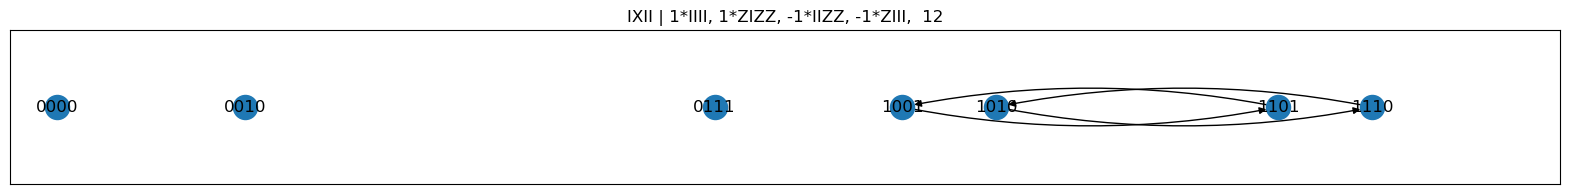

['1001', '1101', '1010', '1110']
bruteforce solution: [['cx', 2, 3]]
['1001', '1101', '1011', '1111']
bruteforce cost: 2 + a multi-controlled Rz with 1 controls.

decomposition:
 4 CX, 
 2 Rotations,

old cost:
 12 CX + 2 Rz-gates
Brute force vs. old costs (random examples):
  Num qubits    Num generators    CX cost (bf)    R cost (bf)    CX cost (old)    R cost (old)
------------  ----------------  --------------  -------------  ---------------  --------------
           4                 1               8              9               24               1
           4                 2               8              2               20               2
           4                 2               8              2               20               2
           4                 2               4              2               20               2
           4                 2               8              2               16               2
           4                 2               8             

In [ ]:
table_of_costs = []

m=Mixer(B,digraph=True, reduced=False,sort=True)
print("commpairs=", m.commuting_pairs)

m.get_best_mixer_commuting_graphs()

table_of_cx = []
table_of_r = []

for g in m.graph_family:
    plt.figure(figsize=(20,2))
    tmp=""
    for ps in g.PS:
        tmp+=str(ps)+", "
    plt.title(g.Xl+" | "+tmp+" "+str(g.cost))
    nx.draw_networkx_nodes(g.G, g.positions)
    nx.draw_networkx_labels(g.G, g.positions, labels=g.labels)
    nx.draw_networkx_edges(g.G, g.positions, connectionstyle="arc3,rad=0.1")
    plt.xlim([-.5,2**len(B[0])])
    plt.show()
    #print(g.G.edges)
    selection = []
    for e in g.G.edges:
        for n in e:
            if n in selection:
                pass
            else:
                selection.append(n)
    #print(g.G.edges, selection)
    group_size = len(g.G.edges)
    k = int(np.log2(len(selection)))
    n = len(selection[0])
    m_ = n-k-1
    bruteforce_solution, bruteforce_cost, bruteforce_solution_result, bruteforce_sorted_bits = find_solution(selection,maxcost=100+40*k*m_,maxdepth=5+2*k*m_)
    print(selection)
    print('bruteforce solution:',bruteforce_solution)
    print(bruteforce_solution_result)
    
    bruteforce_cost = 0
    for gate in bruteforce_solution:
        if gate[0] == 'cx':
            bruteforce_cost += 1
    
    num_cx, num_r = decompose_mcrx(m_)
    num_cx *= k
    num_r *= k
    
    cmstring = ''
    for i in range(m_):
        cmstring += 'C'
    cmstring += 'X'
    cnstring = ''
    for i in range(n-1):
        cnstring += 'C'
    cnstring += 'X'
    print('bruteforce cost:',2*bruteforce_cost, '+' k,'multi-controlled Rx with',m_,'controls.\n')
    print('decomposition:\n',2*bruteforce_cost+num_cx, 'CX, \n',num_r,'Rot\n')
    print('old cost:\n',g.cost,'CX +',int(np.log2(group_size)),'Rz-gates')
    
    table_of_costs.append([n,k, 2*bruteforce_cost+num_cx, num_r, g.cost, int(np.log2(group_size))])

        
        
print('Brute force vs. old costs (random examples):')
print(tabulate(table_of_costs, headers=['Num qubits', 'Num generators', 'CX cost (bf)', 'R cost (bf)', 'CX cost (old)', 'R cost (old)']))   

print('\n \n') 
    


Scaling the problem:

In [15]:


table_of_costs = []

for n in [3,4,5]:
    for k in np.arange(1,n):
        group_size = 0
        while group_size < 2**k:
            rb = random_bitstring(n)
            random_paulistrings = [random_paulistring(n) for i in range(k)]
            pauli_group = generate_pauli_group(random_paulistrings,n)
            B = [multiply_pauli_with_bitstring(p,rb) for p in pauli_group]
            
            group_size = len(pauli_group)
            
        print(n,k,pauli_group,B,'\n')
        
        m_ = n-k-1
        bruteforce_solution, bruteforce_cost, bruteforce_solution_result, bruteforce_sorted_bits = find_solution(B,maxcost=200+80*k*m_,maxdepth=5+2*k*m_)
        
        print('bruteforce solution:',bruteforce_solution)
        print(bruteforce_solution_result)
        
        bruteforce_cost = 0
        for gate in bruteforce_solution:
            if gate[0] == 'cx':
                bruteforce_cost += 1
        
        num_cx, num_r = decompose_mcrx(m_)
        num_cx *= k
        num_r *= k
        
        cmstring = ''
        for i in range(m_):
            cmstring += 'C'
        cmstring += 'X'
        cnstring = ''
        for i in range(n-1):
            cnstring += 'C'
        cnstring += 'X'
        print('bruteforce cost:',2*bruteforce_cost, '+' ,k,'multi-controlled Rx with',m_,'controls.\n')
        print('decomposition:\n',2*bruteforce_cost+num_cx, 'CX, \n',num_r,'Rot\n')
        print('old cost:\n',g.cost,'CX +',int(np.log2(group_size)),'Rz-gates')
        
        table_of_costs.append([n,k, 2*bruteforce_cost+num_cx, num_r, g.cost, int(np.log2(group_size))])

        
        
print('Brute force vs. old costs (random examples):')
print(tabulate(table_of_costs, headers=['Num qubits', 'Num generators', 'CX cost (bf)', 'R cost (bf)', 'CX cost (old)', 'R cost (old)']))   

print('\n \n') 

3 1 ['III', 'IXX'] ['001', '010'] 

bruteforce solution: [['x', 0], ['cx', 1, 2]]
['101', '111']
bruteforce cost: 2 + 1 multi-controlled Rx with 1 controls.

decomposition:
 4 CX, 
 3 Rot

old cost:
 12 CX + 1 Rz-gates
3 2 ['III', 'IXX', 'XIX', 'XXI'] ['011', '000', '110', '101'] 

bruteforce solution: [['x', 0], ['cx', 0, 1], ['cx', 1, 2]]
['101', '111', '011', '001']
bruteforce cost: 4 + 2 multi-controlled Rx with 0 controls.

decomposition:
 4 CX, 
 2 Rot

old cost:
 12 CX + 2 Rz-gates
4 1 ['IIII', 'XIII'] ['1111', '0111'] 

bruteforce solution: []
['1111', '0111']
bruteforce cost: 0 + 1 multi-controlled Rx with 2 controls.

decomposition:
 4 CX, 
 4 Rot

old cost:
 12 CX + 1 Rz-gates
4 2 ['IIII', 'IIXI', 'IIXX', 'IIIX'] ['0000', '0010', '0011', '0001'] 

bruteforce solution: [['x', 0], ['x', 1]]
['1100', '1110', '1111', '1101']
bruteforce cost: 0 + 2 multi-controlled Rx with 1 controls.

decomposition:
 4 CX, 
 6 Rot

old cost:
 12 CX + 2 Rz-gates
4 3 ['IIII', 'XIIX', 'IIXX', 'XIXI

In [19]:
table_of_costs = []

for n in [3,4,5]:
    for k in np.arange(1,n):
        group_size = 0
        while group_size < 2**k:
            rb = random_bitstring(n)
            random_paulistrings = [random_paulistring(n) for i in range(k)]
            pauli_group = generate_pauli_group(random_paulistrings,n)
            B = [multiply_pauli_with_bitstring(p,rb) for p in pauli_group]
            
            group_size = len(pauli_group)
            
        print(n,k,pauli_group,B,'\n')


        m=Mixer(B,digraph=True, reduced=False,sort=True)
        print("commpairs=", m.commuting_pairs)

        m.get_best_mixer_commuting_graphs()

        table_of_cx = []
        table_of_r = []

        for g in m.graph_family:
            
            if len(g.G.nodes) == group_size:
            
                bruteforce_solution, bruteforce_cost, bruteforce_solution_result, bruteforce_sorted_bits = find_solution(B,maxcost=100+40*k*m_,maxdepth=5+2*k*m_)
                print(B)
                print('bruteforce solution:',bruteforce_solution)
                print(bruteforce_solution_result)
                
                bruteforce_cost = 0
                for gate in bruteforce_solution:
                    if gate[0] == 'cx':
                        bruteforce_cost += 1
                
                num_cx, num_r = decompose_mcrx(m_)
                num_cx *= k
                num_r *= k
                
                cmstring = ''
                for i in range(m_):
                    cmstring += 'C'
                cmstring += 'X'
                cnstring = ''
                for i in range(n-1):
                    cnstring += 'C'
                cnstring += 'X'
                print('bruteforce cost:',2*bruteforce_cost, '+', k,'multi-controlled Rx with',m_,'controls.\n')
                print('decomposition:\n',2*bruteforce_cost+num_cx, 'CX, \n',num_r,'Rot\n')
                print('old cost:\n',g.cost,'CX +',int(np.log2(group_size)),'Rz-gates')
                
                table_of_costs.append([(random_paulistrings,rb),n,k, 2*bruteforce_cost+num_cx, num_r, g.cost, int(np.log2(group_size))])

        
        
print('Brute force vs. old costs (random examples):')
print(tabulate(table_of_costs, headers=['Generator','Num qubits', 'Num generators', 'CX cost (bf)', 'R cost (bf)', 'CX cost (old)', 'R cost (old)']))   

print('\n \n') 

3 1 ['III', 'XII'] ['011', '111'] 

computing family of graphs


100%|██████████| 1/1 [00:00<00:00, 34.19it/s]


commpairs= {'XII': [[0, 1]]}
0 / 1 Number of combinations  1  choose  0 = 1.0


1it [00:00, ?it/s]


1 / 1 Number of combinations  1  choose  1 = 1.0


1it [00:00, 184.83it/s]


['011', '111']
bruteforce solution: []
['011', '111']
bruteforce cost: 0 + 1 multi-controlled Rx with 0 controls.

decomposition:
 0 CX, 
 1 Rot

old cost:
 8 CX + 1 Rz-gates
3 2 ['III', 'XIX', 'IXI', 'XXX'] ['011', '110', '001', '100'] 

computing family of graphs


100%|██████████| 3/3 [00:00<00:00, 288.12it/s]


commpairs= {'IXI': [[0, 1], [2, 3]], 'XIX': [[0, 2], [1, 3]], 'XXX': [[0, 3], [1, 2]]}
0 / 3 Number of combinations  3  choose  0 = 1.0


1it [00:00, ?it/s]


1 / 3 Number of combinations  3  choose  1 = 3.0


3it [00:00, ?it/s]


2 / 3 Number of combinations  3  choose  2 = 3.0


3it [00:00, ?it/s]


['011', '110', '001', '100']
bruteforce solution: [['cx', 0, 2]]
['011', '111', '001', '101']
bruteforce cost: 2 + 2 multi-controlled Rx with 0 controls.

decomposition:
 2 CX, 
 2 Rot

old cost:
 4 CX + 2 Rz-gates
['011', '110', '001', '100']
bruteforce solution: [['cx', 0, 2]]
['011', '111', '001', '101']
bruteforce cost: 2 + 2 multi-controlled Rx with 0 controls.

decomposition:
 2 CX, 
 2 Rot

old cost:
 4 CX + 2 Rz-gates
['011', '110', '001', '100']
bruteforce solution: [['cx', 0, 2]]
['011', '111', '001', '101']
bruteforce cost: 2 + 2 multi-controlled Rx with 0 controls.

decomposition:
 2 CX, 
 2 Rot

old cost:
 8 CX + 2 Rz-gates
4 1 ['IIII', 'IIXI'] ['0101', '0111'] 

computing family of graphs


100%|██████████| 1/1 [00:00<00:00,  9.83it/s]


commpairs= {'IIXI': [[0, 1]]}
0 / 1 Number of combinations  1  choose  0 = 1.0


1it [00:00, ?it/s]


1 / 1 Number of combinations  1  choose  1 = 1.0


1it [00:00, 1396.24it/s]


['0101', '0111']
bruteforce solution: [['x', 0]]
['1101', '1111']
bruteforce cost: 0 + 1 multi-controlled Rx with 0 controls.

decomposition:
 0 CX, 
 1 Rot

old cost:
 24 CX + 1 Rz-gates
4 2 ['IIII', 'XIXX', 'XIII', 'IIXX'] ['0101', '1110', '1101', '0110'] 

computing family of graphs


100%|██████████| 3/3 [00:00<00:00, 34.28it/s]


commpairs= {'IIXX': [[0, 1], [2, 3]], 'XIII': [[0, 2], [1, 3]], 'XIXX': [[0, 3], [1, 2]]}
0 / 3 Number of combinations  3  choose  0 = 1.0


1it [00:00, ?it/s]


1 / 3 Number of combinations  3  choose  1 = 3.0


3it [00:00, ?it/s]


2 / 3 Number of combinations  3  choose  2 = 3.0


3it [00:00, 2310.49it/s]


['0101', '1110', '1101', '0110']
bruteforce solution: [['cx', 2, 3]]
['0101', '1111', '1101', '0111']
bruteforce cost: 2 + 2 multi-controlled Rx with 0 controls.

decomposition:
 2 CX, 
 2 Rot

old cost:
 12 CX + 2 Rz-gates
['0101', '1110', '1101', '0110']
bruteforce solution: [['cx', 2, 3]]
['0101', '1111', '1101', '0111']
bruteforce cost: 2 + 2 multi-controlled Rx with 0 controls.

decomposition:
 2 CX, 
 2 Rot

old cost:
 12 CX + 2 Rz-gates
['0101', '1110', '1101', '0110']
bruteforce solution: [['cx', 2, 3]]
['0101', '1111', '1101', '0111']
bruteforce cost: 2 + 2 multi-controlled Rx with 0 controls.

decomposition:
 2 CX, 
 2 Rot

old cost:
 20 CX + 2 Rz-gates
4 3 ['IIII', 'XXXX', 'IXXI', 'XIIX', 'XXIX', 'IIXI', 'XIXX', 'IXII'] ['0101', '1010', '0011', '1100', '1000', '0111', '1110', '0001'] 

computing family of graphs


100%|██████████| 7/7 [00:00<00:00, 29.87it/s]


commpairs= {'IIXI': [[0, 1], [2, 3], [4, 5], [6, 7]], 'IXII': [[0, 2], [1, 3], [4, 6], [5, 7]], 'IXXI': [[0, 3], [1, 2], [4, 7], [5, 6]], 'XIIX': [[0, 4], [1, 5], [2, 6], [3, 7]], 'XIXX': [[0, 5], [1, 4], [2, 7], [3, 6]], 'XXIX': [[0, 6], [1, 7], [2, 4], [3, 5]], 'XXXX': [[0, 7], [1, 6], [2, 5], [3, 4]]}
0 / 7 Number of combinations  7  choose  0 = 1.0


1it [00:00, 1999.19it/s]


1 / 7 Number of combinations  7  choose  1 = 7.0


7it [00:00, ?it/s]


2 / 7 Number of combinations  7  choose  2 = 21.0


21it [00:00, 1990.25it/s]


3 / 7 Number of combinations  7  choose  3 = 35.0


35it [00:00, 7000.17it/s]


['0101', '1010', '0011', '1100', '1000', '0111', '1110', '0001']
bruteforce solution: [['cx', 0, 3]]
['0101', '1011', '0011', '1101', '1001', '0111', '1111', '0001']
bruteforce cost: 2 + 3 multi-controlled Rx with 0 controls.

decomposition:
 2 CX, 
 3 Rot

old cost:
 4 CX + 3 Rz-gates
['0101', '1010', '0011', '1100', '1000', '0111', '1110', '0001']
bruteforce solution: [['cx', 0, 3]]
['0101', '1011', '0011', '1101', '1001', '0111', '1111', '0001']
bruteforce cost: 2 + 3 multi-controlled Rx with 0 controls.

decomposition:
 2 CX, 
 3 Rot

old cost:
 4 CX + 3 Rz-gates
['0101', '1010', '0011', '1100', '1000', '0111', '1110', '0001']
bruteforce solution: [['cx', 0, 3]]
['0101', '1011', '0011', '1101', '1001', '0111', '1111', '0001']
bruteforce cost: 2 + 3 multi-controlled Rx with 0 controls.

decomposition:
 2 CX, 
 3 Rot

old cost:
 8 CX + 3 Rz-gates
['0101', '1010', '0011', '1100', '1000', '0111', '1110', '0001']
bruteforce solution: [['cx', 0, 3]]
['0101', '1011', '0011', '1101', '1001

100%|██████████| 1/1 [00:00<00:00,  5.43it/s]


commpairs= {'IXXXI': [[0, 1]]}
0 / 1 Number of combinations  1  choose  0 = 1.0


1it [00:00, ?it/s]


1 / 1 Number of combinations  1  choose  1 = 1.0


1it [00:00, ?it/s]


['00101', '01011']
bruteforce solution: [['x', 0], ['cx', 2, 1], ['cx', 2, 3]]
['11111', '11011']
bruteforce cost: 4 + 1 multi-controlled Rx with 0 controls.

decomposition:
 4 CX, 
 1 Rot

old cost:
 96 CX + 1 Rz-gates
5 2 ['IIIII', 'XXIII', 'XIIII', 'IXIII'] ['00111', '11111', '10111', '01111'] 

computing family of graphs


100%|██████████| 3/3 [00:00<00:00, 12.64it/s]


commpairs= {'IXIII': [[0, 1], [2, 3]], 'XIIII': [[0, 2], [1, 3]], 'XXIII': [[0, 3], [1, 2]]}
0 / 3 Number of combinations  3  choose  0 = 1.0


1it [00:00, ?it/s]


1 / 3 Number of combinations  3  choose  1 = 3.0


3it [00:00, ?it/s]


2 / 3 Number of combinations  3  choose  2 = 3.0


3it [00:00, 2729.48it/s]


['00111', '11111', '10111', '01111']
bruteforce solution: []
['00111', '11111', '10111', '01111']
bruteforce cost: 0 + 2 multi-controlled Rx with 0 controls.

decomposition:
 0 CX, 
 2 Rot

old cost:
 24 CX + 2 Rz-gates
['00111', '11111', '10111', '01111']
bruteforce solution: []
['00111', '11111', '10111', '01111']
bruteforce cost: 0 + 2 multi-controlled Rx with 0 controls.

decomposition:
 0 CX, 
 2 Rot

old cost:
 24 CX + 2 Rz-gates
['00111', '11111', '10111', '01111']
bruteforce solution: []
['00111', '11111', '10111', '01111']
bruteforce cost: 0 + 2 multi-controlled Rx with 0 controls.

decomposition:
 0 CX, 
 2 Rot

old cost:
 40 CX + 2 Rz-gates
5 3 ['IIIII', 'IXXXI', 'IXIXI', 'IIXII', 'IXIXX', 'IIXIX', 'IIIIX', 'IXXXX'] ['00001', '01111', '01011', '00101', '01010', '00100', '00000', '01110'] 

computing family of graphs


100%|██████████| 7/7 [00:01<00:00,  6.81it/s]


commpairs= {'IIIIX': [[0, 1], [2, 3], [4, 5], [6, 7]], 'IIXII': [[0, 2], [1, 3], [4, 6], [5, 7]], 'IIXIX': [[0, 3], [1, 2], [4, 7], [5, 6]], 'IXIXI': [[0, 4], [1, 5], [2, 6], [3, 7]], 'IXIXX': [[0, 5], [1, 4], [2, 7], [3, 6]], 'IXXXI': [[0, 6], [1, 7], [2, 4], [3, 5]], 'IXXXX': [[0, 7], [1, 6], [2, 5], [3, 4]]}
0 / 7 Number of combinations  7  choose  0 = 1.0


1it [00:00, 1998.24it/s]


1 / 7 Number of combinations  7  choose  1 = 7.0


7it [00:00, ?it/s]


2 / 7 Number of combinations  7  choose  2 = 21.0


21it [00:00, 621.08it/s]


3 / 7 Number of combinations  7  choose  3 = 35.0


35it [00:00, 6055.38it/s]


['00001', '01111', '01011', '00101', '01010', '00100', '00000', '01110']
bruteforce solution: [['x', 0], ['x', 1], ['cx', 1, 3]]
['11011', '10111', '10011', '11111', '10010', '11110', '11010', '10110']
bruteforce cost: 2 + 3 multi-controlled Rx with 0 controls.

decomposition:
 2 CX, 
 3 Rot

old cost:
 12 CX + 3 Rz-gates
['00001', '01111', '01011', '00101', '01010', '00100', '00000', '01110']
bruteforce solution: [['x', 0], ['x', 1], ['cx', 1, 3]]
['11011', '10111', '10011', '11111', '10010', '11110', '11010', '10110']
bruteforce cost: 2 + 3 multi-controlled Rx with 0 controls.

decomposition:
 2 CX, 
 3 Rot

old cost:
 12 CX + 3 Rz-gates
['00001', '01111', '01011', '00101', '01010', '00100', '00000', '01110']
bruteforce solution: [['x', 0], ['x', 1], ['cx', 1, 3]]
['11011', '10111', '10011', '11111', '10010', '11110', '11010', '10110']
bruteforce cost: 2 + 3 multi-controlled Rx with 0 controls.

decomposition:
 2 CX, 
 3 Rot

old cost:
 20 CX + 3 Rz-gates
['00001', '01111', '01011', 

100%|██████████| 15/15 [00:01<00:00, 11.28it/s]


commpairs= {'IIIIX': [[0, 1], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11], [12, 13], [14, 15]], 'IIIXI': [[0, 2], [1, 3], [4, 6], [5, 7], [8, 10], [9, 11], [12, 14], [13, 15]], 'IIIXX': [[0, 3], [1, 2], [4, 7], [5, 6], [8, 11], [9, 10], [12, 15], [13, 14]], 'IIXII': [[0, 4], [1, 5], [2, 6], [3, 7], [8, 12], [9, 13], [10, 14], [11, 15]], 'IIXIX': [[0, 5], [1, 4], [2, 7], [3, 6], [8, 13], [9, 12], [10, 15], [11, 14]], 'IIXXI': [[0, 6], [1, 7], [2, 4], [3, 5], [8, 14], [9, 15], [10, 12], [11, 13]], 'IIXXX': [[0, 7], [1, 6], [2, 5], [3, 4], [8, 15], [9, 14], [10, 13], [11, 12]], 'XXIII': [[0, 8], [1, 9], [2, 10], [3, 11], [4, 12], [5, 13], [6, 14], [7, 15]], 'XXIIX': [[0, 9], [1, 8], [2, 11], [3, 10], [4, 13], [5, 12], [6, 15], [7, 14]], 'XXIXI': [[0, 10], [1, 11], [2, 8], [3, 9], [4, 14], [5, 15], [6, 12], [7, 13]], 'XXIXX': [[0, 11], [1, 10], [2, 9], [3, 8], [4, 15], [5, 14], [6, 13], [7, 12]], 'XXXII': [[0, 12], [1, 13], [2, 14], [3, 15], [4, 8], [5, 9], [6, 10], [7, 11]], 'XXXIX': [[0, 13

1it [00:00, 1000.31it/s]


1 / 15 Number of combinations  15  choose  1 = 15.0


15it [00:00, 14993.94it/s]


2 / 15 Number of combinations  15  choose  2 = 105.0


105it [00:00, 1087.31it/s]


3 / 15 Number of combinations  15  choose  3 = 455.0


455it [00:00, 591.73it/s]


4 / 15 Number of combinations  15  choose  4 = 1365.0


1365it [00:00, 10437.87it/s]

['10100', '10000', '10101', '10001', '01010', '01110', '01011', '01111', '10110', '10010', '10111', '10011', '01000', '01100', '01001', '01101']
bruteforce solution: [['cx', 0, 1]]
['11100', '11000', '11101', '11001', '01010', '01110', '01011', '01111', '11110', '11010', '11111', '11011', '01000', '01100', '01001', '01101']
bruteforce cost: 2 + 4 multi-controlled Rx with 0 controls.

decomposition:
 2 CX, 
 4 Rot

old cost:
 4 CX + 4 Rz-gates
['10100', '10000', '10101', '10001', '01010', '01110', '01011', '01111', '10110', '10010', '10111', '10011', '01000', '01100', '01001', '01101']
bruteforce solution: [['cx', 0, 1]]
['11100', '11000', '11101', '11001', '01010', '01110', '01011', '01111', '11110', '11010', '11111', '11011', '01000', '01100', '01001', '01101']
bruteforce cost: 2 + 4 multi-controlled Rx with 0 controls.

decomposition:
 2 CX, 
 4 Rot

old cost:
 4 CX + 4 Rz-gates


['10100', '10000', '10101', '10001', '01010', '01110', '01011', '01111', '10110', '10010', '10111', '10011', '01000', '01100', '01001', '01101']
bruteforce solution: [['cx', 0, 1]]
['11100', '11000', '11101', '11001', '01010', '01110', '01011', '01111', '11110', '11010', '11111', '11011', '01000', '01100', '01001', '01101']
bruteforce cost: 2 + 4 multi-controlled Rx with 0 controls.

decomposition:
 2 CX, 
 4 Rot

old cost:
 8 CX + 4 Rz-gates
['10100', '10000', '10101', '10001', '01010', '01110', '01011', '01111', '10110', '10010', '10111', '10011', '01000', '01100', '01001', '01101']
bruteforce solution: [['cx', 0, 1]]
['11100', '11000', '11101', '11001', '01010', '01110', '01011', '01111', '11110', '11010', '11111', '11011', '01000', '01100', '01001', '01101']
bruteforce cost: 2 + 4 multi-controlled Rx with 0 controls.

decomposition:
 2 CX, 
 4 Rot

old cost:
 4 CX + 4 Rz-gates
['10100', '10000', '10101', '10001', '01010', '01110', '01011', '01111', '10110', '10010', '10111', '10011

In [ ]:
def get_Dicke(n,l,k):
    ret = []
    for s in ["".join(i) for i in itertools.product("01", repeat=n)]:
        nones=len(s.replace("0", ""))
        if l<=nones<=k:
            ret.append(s)
    return ret


In [ ]:
def get_XY_terms_chain(n):
    white=[]
    for i in range(1,n):
        tmp=""
        for j in range(i-1):
            tmp+="I"
        tmp+="XX"
        for j in range(i+1,n):
            tmp+="I"
        white.append(tmp)
    black = []
    for s in ["".join(i) for i in itertools.product("IX", repeat=n)]:
        nXs=len(s.replace("I", ""))
        if s not in white:
            if nXs==2 or nXs!=1:
                black.append(s)
    return white, black

In [ ]:
n=5
B=get_Dicke(n,2,3)
white,black=get_XY_terms_chain(n)
print("white listed logical Xs:", white)
print("black listed logical Xs:", black)

white listed logical Xs: ['XXIII', 'IXXII', 'IIXXI', 'IIIXX']
black listed logical Xs: ['IIIII', 'IIXIX', 'IIXXX', 'IXIIX', 'IXIXI', 'IXIXX', 'IXXIX', 'IXXXI', 'IXXXX', 'XIIIX', 'XIIXI', 'XIIXX', 'XIXII', 'XIXIX', 'XIXXI', 'XIXXX', 'XXIIX', 'XXIXI', 'XXIXX', 'XXXII', 'XXXIX', 'XXXXI', 'XXXXX']


computing family of graphs


100%|██████████| 31/31 [00:05<00:00,  5.58it/s]


commpairs= {'IIXXI': [[0, 1], [5, 7], [6, 8], [11, 13], [12, 14], [18, 19]], 'IIXIX': [[0, 2], [4, 7], [6, 9], [10, 13], [12, 15], [17, 19]], 'IIXII': [[0, 3], [4, 8], [5, 9], [10, 14], [11, 15], [16, 19]], 'IXIXI': [[0, 4], [2, 7], [3, 8], [11, 16], [12, 17], [15, 19]], 'IXIIX': [[0, 5], [1, 7], [3, 9], [10, 16], [12, 18], [14, 19]], 'IXIII': [[0, 6], [1, 8], [2, 9], [10, 17], [11, 18], [13, 19]], 'IXXXX': [[0, 7], [1, 5], [2, 4], [12, 19], [14, 18], [15, 17]], 'IXXXI': [[0, 8], [1, 6], [3, 4], [11, 19], [13, 18], [15, 16]], 'IXXIX': [[0, 9], [2, 6], [3, 5], [10, 19], [13, 17], [14, 16]], 'XIIXI': [[0, 10], [2, 13], [3, 14], [5, 16], [6, 17], [9, 19]], 'XIIIX': [[0, 11], [1, 13], [3, 15], [4, 16], [6, 18], [8, 19]], 'XIIII': [[0, 12], [1, 14], [2, 15], [4, 17], [5, 18], [7, 19]], 'XIXXX': [[0, 13], [1, 11], [2, 10], [6, 19], [8, 18], [9, 17]], 'XIXXI': [[0, 14], [1, 12], [3, 10], [5, 19], [7, 18], [9, 16]], 'XIXIX': [[0, 15], [2, 12], [3, 11], [4, 19], [7, 17], [8, 16]], 'XXIXX': [[0,

1it [00:00, ?it/s]


1 / 31 Number of combinations  31  choose  1 = 31.0


31it [00:00, ?it/s]


2 / 31 Number of combinations  31  choose  2 = 465.0


465it [00:00, 33207.64it/s]


3 / 31 Number of combinations  31  choose  3 = 4495.0


4495it [00:00, 12802.62it/s]


4 / 31 Number of combinations  31  choose  4 = 31465.0


31465it [00:24, 1292.46it/s]


5 / 31 Number of combinations  31  choose  5 = 169911.0


169911it [00:08, 20132.90it/s]


IIXXI [[0.375*IIIII, -0.375*IIZZI]]
IIXIX [[0.375*IIIII, -0.375*IIZIZ]]
IIXII [[0.375*IIIII, 0.375*ZZIZZ], [-0.125*IZIZI, -0.125*ZIIIZ], [-0.125*IZIIZ, -0.125*ZIIZI], [-0.125*IIIZZ, -0.125*ZZIII]]
IXIXI [[0.375*IIIII, -0.375*IZIZI]]
XIIXI [[0.375*IIIII, -0.375*ZIIZI]]
number of solutions: 750
cost= 24


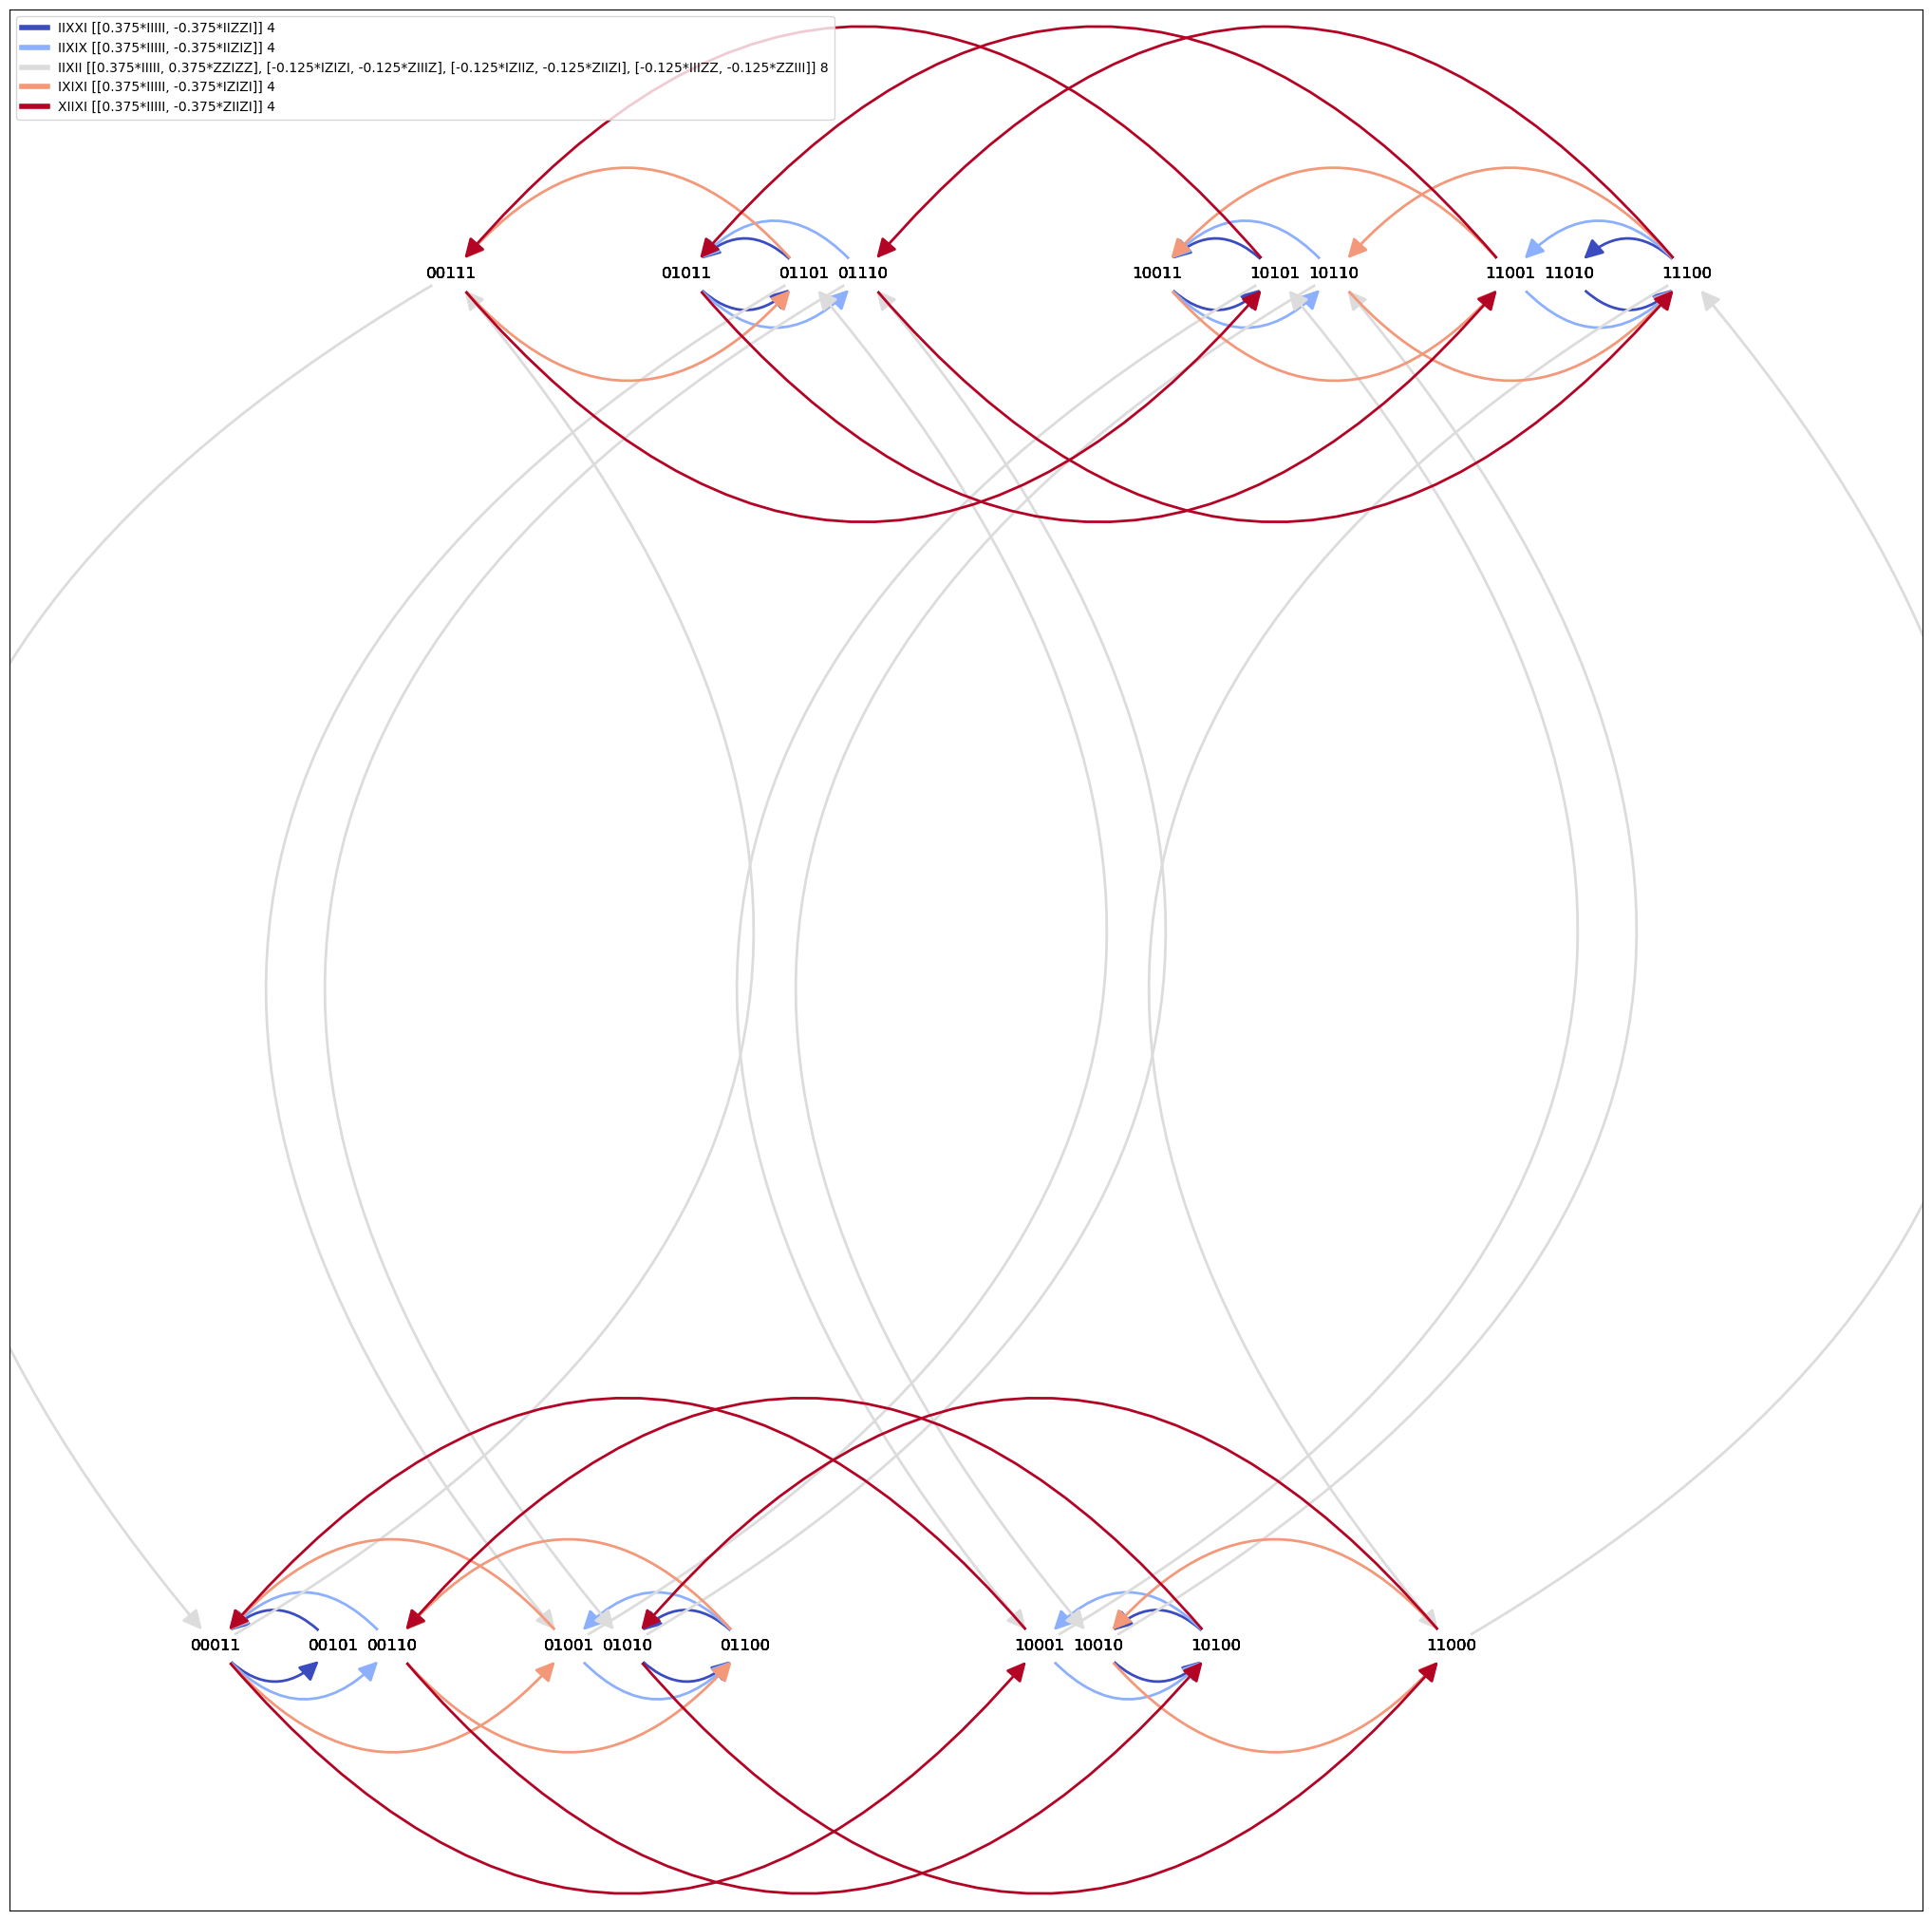

In [ ]:
m=Mixer(B,digraph=True, reduced=True,sort=True)
print("commpairs=", m.commuting_pairs)

m.get_best_mixer_commuting_graphs()

for g in m.solution_reduced[0]:
    print(g.Xl, g.PS_reduced)

plotsolution(m, True, plotall=False, dicke=True)
print("cost=",m.solution_reduced_cost)